---
<div align="center">
<h1><span style="color:red;">Surfing the Bitcoin Waves: Comprehensive Trend Forecasting with Various Trader Types</span></h1>
</div>

---
# Authors:
<h3>
<ol>
  <li>Can Ali Ateş - Hacettepe University, Turkey</li>
  <li>Emre Çoban - Hacettepe University, Turkey</li>
</ol>   
</h3>

---
# Problem Definition:
<b></b>
<div style="font-size: 18px;">
    <p>The goal of this project is to thoroughly analyze trends in Bitcoin by studying the behaviors of three key groups:</p>
    <ol>
        <li>Large holders of cryptocurrency (referred to as "whales")</li>
        <li>Influential participants in the stock market (widely recognized as “top traders”)</li>
        <li>Automated trading algorithms (commonly known as "bots")</li>
    </ol>
</div>

---
# Table of Contents

## 1. [Dataset](#1)
    
### <sub>&nbsp;&nbsp;&nbsp;&nbsp;</sub>1.1. [Data Explanation](#1.1)
### <sub>&nbsp;&nbsp;&nbsp;&nbsp;</sub>1.2. [Data Visualization](#1.2)
### <sub>&nbsp;&nbsp;&nbsp;&nbsp;</sub>1.3. [Data Frame Creation](#1.3)
    
## 2. [Exploratory Data Analysis and Preprocessing](#2)

### <sub>&nbsp;&nbsp;&nbsp;&nbsp;</sub>2.1. [Get Insights](#2.1)
### <sub>&nbsp;&nbsp;&nbsp;&nbsp;</sub>2.2. [Handling Missing Values](#2.2)
### <sub>&nbsp;&nbsp;&nbsp;&nbsp;</sub>2.3. [Outlier Analysis](#2.3)
### <sub>&nbsp;&nbsp;&nbsp;&nbsp;</sub>2.4. [Feature Selection and Engineering](#2.4)
### <sub>&nbsp;&nbsp;&nbsp;&nbsp;</sub>2.5. [Splitting Data Into Train, Validation and Test](#2.5)
### <sub>&nbsp;&nbsp;&nbsp;&nbsp;</sub>2.6. [Scaling Data](#2.6)
### <sub>&nbsp;&nbsp;&nbsp;&nbsp;</sub>2.7. [Splitting Target and Input Feature](#2.7)

## 3. [Methodology](#3)
### <sub>&nbsp;&nbsp;&nbsp;&nbsp;</sub>3.1. [Machine Learning Models](#3.1)
#### <sub>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</sub>3.1.1 [Linear Regression Model](#3.1.1)
#### <sub>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</sub>3.1.2 [Random Forest Regression Model](#3.1.2)
#### <sub>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</sub>3.1.3 [XGBoost Regression Model](#3.1.3)
### <sub>&nbsp;&nbsp;&nbsp;&nbsp;</sub>3.2. [Traditional Forecasting Models](#3.2)
#### <sub>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</sub>3.2.1 [SARIMAX Model](#3.2.1)
#### <sub>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</sub>3.2.2 [Prophet Model](#3.2.2)
### <sub>&nbsp;&nbsp;&nbsp;&nbsp;</sub>3.3. [Deep Learning Models](#3.3)
#### <sub>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</sub>3.3.1 [LSTM-FCN Model](#3.3.1)
#### <sub>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</sub>3.3.2 [FCN Model](#3.3.2)

In [56]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Methodology
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from prophet import Prophet
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras import Model
from tqdm import tqdm
import torch
import torch.nn as nn
from torch.nn.modules.transformer import TransformerEncoder, TransformerEncoderLayer
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim
from tsai.imports import *
from tsai.models.layers import *
from tsai.models.utils import *


# Warnings
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

<a id=1></a>
# 1. Dataset

<a id=1.1></a>
## 1.1 Data Explanation

The dataset is a combination of 8 different CSV files.

1. **klines:** The dataset has “Open”, “Close”, “High” and “Low” price features for the Bitcoin stock market.
2. **botTracker:** The dataset has an “estimatedBotCount” feature which indicates the prediction of bot activity based on the searching for frequently occurring unique order sizes.
3. **binanceGlobalAccounts:** The dataset has “Long”, “Short”, and “Ratio of Short and Long” features that represent the total number of accounts that are long or short strategy on Binance.
4. **binanceTopTraderAccounts:** The dataset has “Long”, “Short”, and “Ratio of Short and Long” features that represent the total number of top trader accounts (top %20) that are long or short strategies on Binance.
5. **binanceTopTraderPositions:** The dataset has “Long”, “Short”, and “Ratio of Short and Long” features that represent the total number of top traders positions (top %20) that are long or short strategy on Binance.
6. **binanceWhaleRetailDelta:** The dataset has a “WhaleRetailPositionDelta” feature that indicates the difference between the percentage of long positions held by top trader accounts ("whales") and the percentage of long positions held by global accounts ("retail").
7. **buyVolume:** The dataset has a “BuyingOrderQuantity” feature that indicates the quantity of buying orders executed during a specified period.
8. **sellVolume:** The dataset has a “SellingOrderQuantity” feature that indicates the quantity of selling orders executed during a specified period.

In [2]:
# Define the CSV files
data_files = ["klines", "botTracker", "binanceGlobalAccounts", "binanceTopTraderAccounts", 
              "binanceTopTraderPositions", "binanceWhaleDelta", "buyVolume", "sellVolume"]

<a id=1.2></a>
## 1.2 Data Visualization

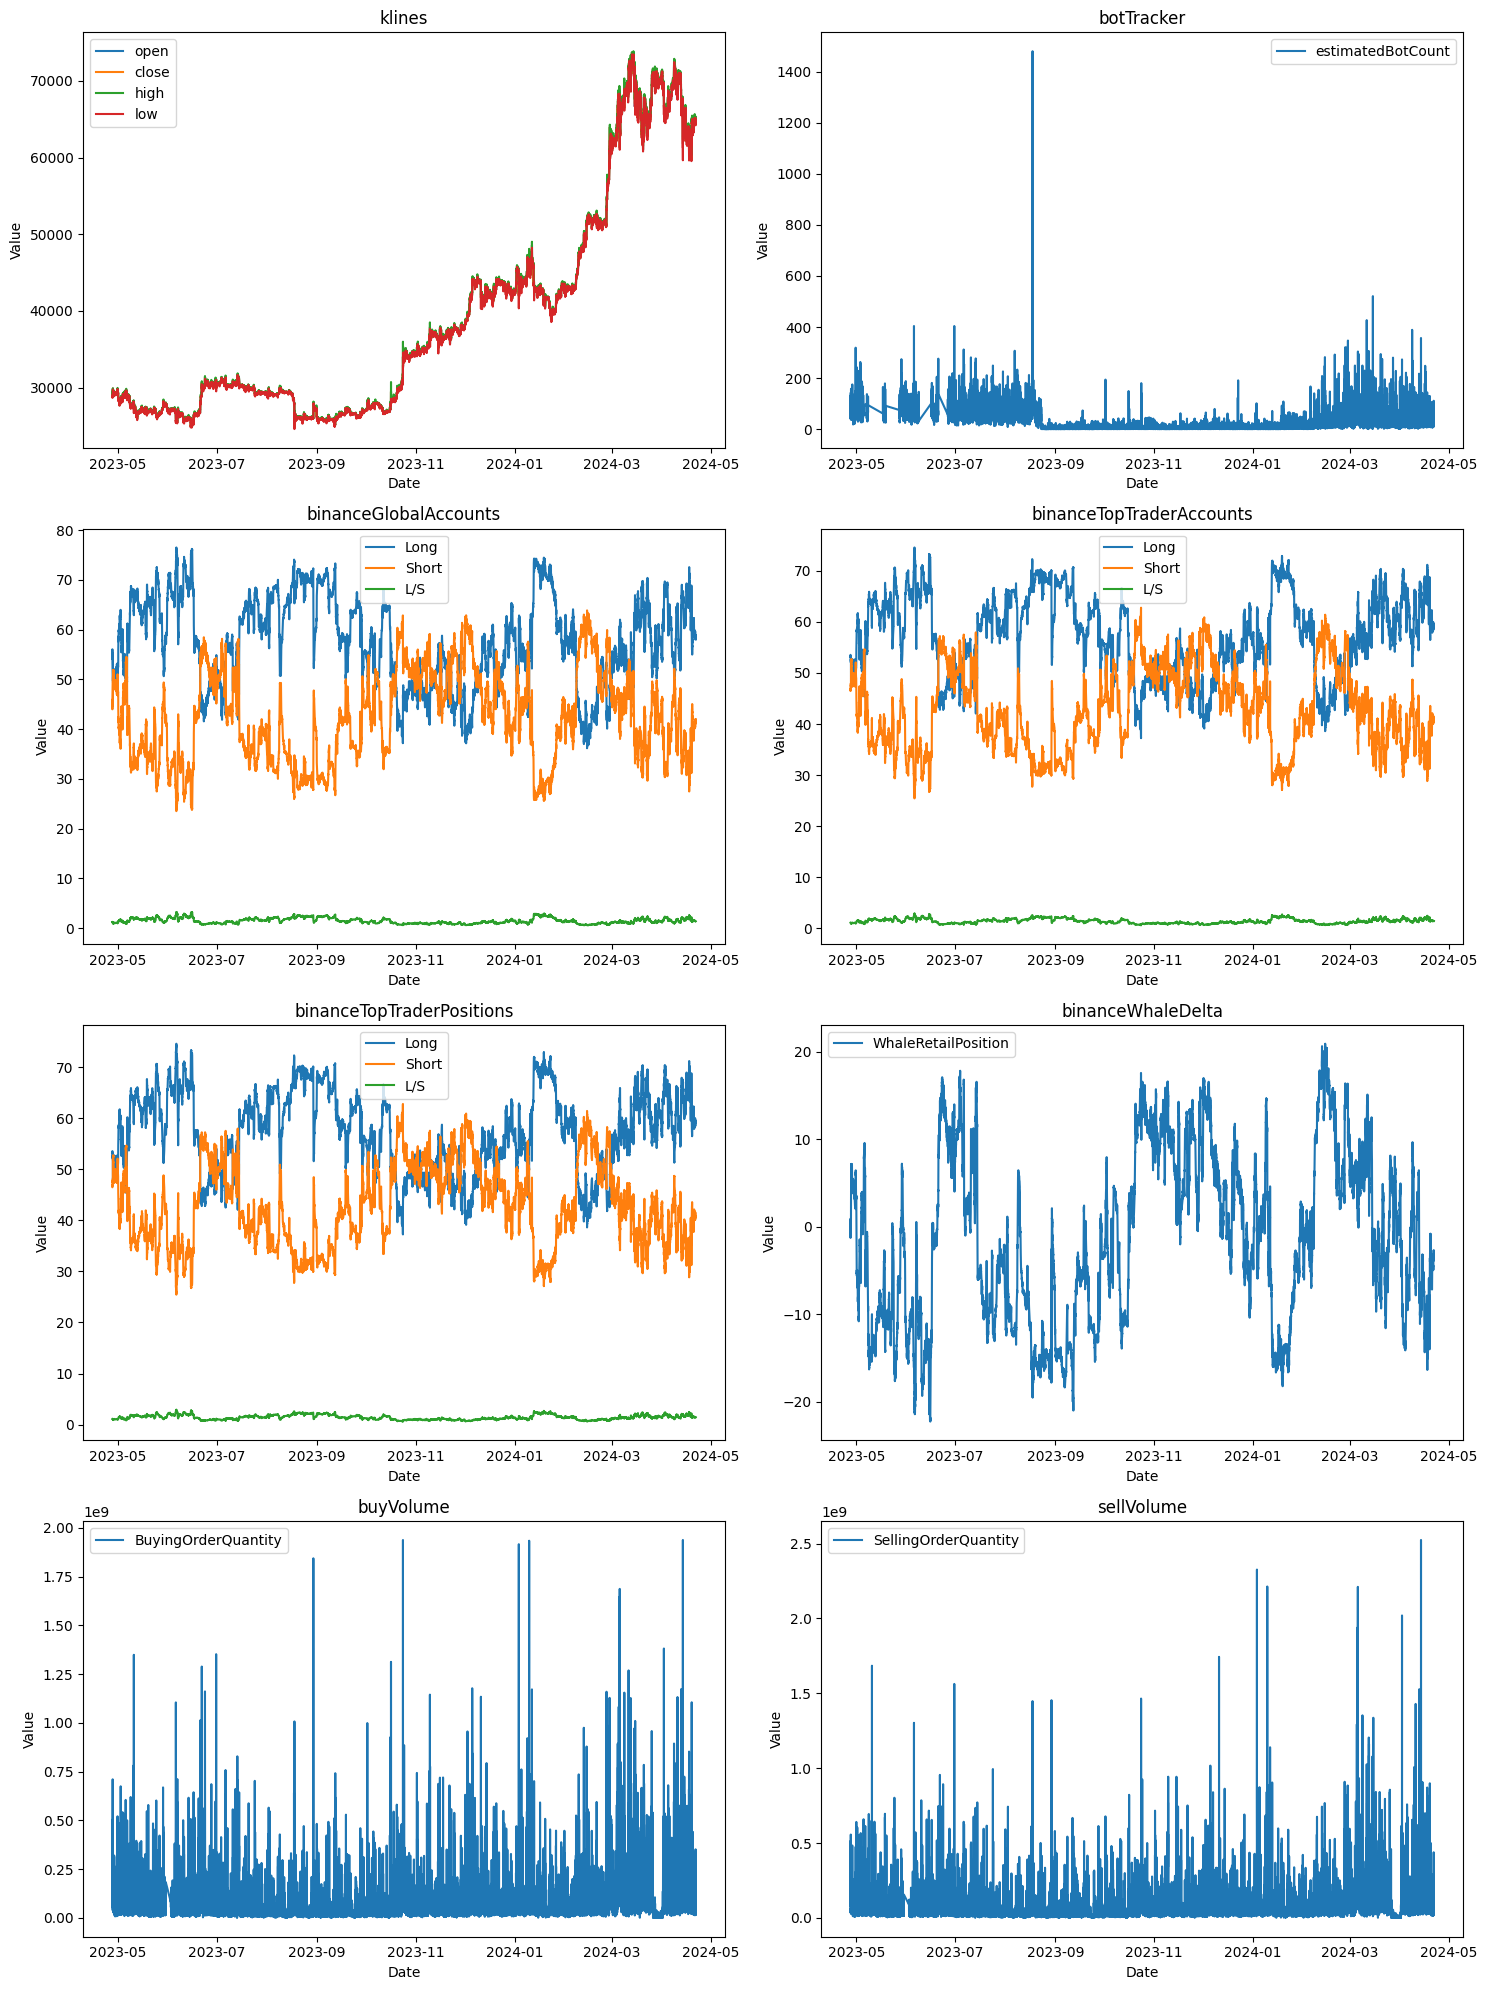

In [3]:
def plot_csv(filename:str, ax:plt.axes):
    # Read the CSV file
    data = pd.read_csv(f"data/{filename}15mins.csv")
    # Convert 'Date' column to datetime
    data['Date'] = pd.to_datetime(data['Date'])
    # Plot the data
    for column in data.columns[1:]:
        ax.plot(data['Date'], data[column], label=column)
    ax.set_title(f'{filename}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Value')
    ax.legend()

def plot_data(files:list):
    # Create a subplot grid to plot all data files
    fig, axs = plt.subplots(4, 2, figsize=(15, 20))
    # Iterate over each data file and plot them into subplot grid
    for i, csv_file in enumerate(files):
        plot_csv(filename=csv_file, ax=axs[i // 2, i % 2])
    # Display the plots
    plt.tight_layout()
    plt.show()

plot_data(data_files)

<a id=1.3></a>
## 1.3 Data Frame Creation

In [4]:
# Create a data frame that holds all information in data files
bitcoin_df = pd.DataFrame(columns=['Date'])

# Merge files based on common column
for file in data_files:
    print(file)
    temp_df = pd.read_csv(f"data/{file}15mins.csv")
    temp_df['Date'] = pd.to_datetime(temp_df['Date'])
    bitcoin_df = pd.merge(bitcoin_df, temp_df, on='Date', how="outer")

# Display the data frame
bitcoin_df.set_index("Date", inplace=True)
display(bitcoin_df)

klines
botTracker
binanceGlobalAccounts
binanceTopTraderAccounts
binanceTopTraderPositions
binanceWhaleDelta
buyVolume
sellVolume


,open,close,high,low,estimatedBotCount,Long_x,Short_x,L/S_x,Long_y,Short_y,L/S_y,Long,Short,L/S,WhaleRetailPosition,BuyingOrderQuantity,SellingOrderQuantity
Date,,,,,,,,,,,,,,,,,
2023-04-27 10:15:00+00:00,28959.3,28937.2,29000.0,28930.8,48.0,55.07,44.93,1.2257,53.02,46.98,1.1286,53.02,46.98,1.1286,-0.17,4.311050e+07,5.464228e+07
2023-04-27 10:30:00+00:00,28937.2,29006.8,29019.4,28937.0,44.0,55.04,44.96,1.2242,53.01,46.99,1.1281,53.01,46.99,1.1281,-0.12,5.897624e+07,3.443539e+07
2023-04-27 10:45:00+00:00,29006.8,28981.9,29029.0,28943.0,65.0,55.12,44.88,1.2282,53.05,46.95,1.1299,53.05,46.95,1.1299,-0.23,5.094587e+07,5.778385e+07
2023-04-27 11:00:00+00:00,28981.9,29077.6,29139.2,28960.0,53.0,55.18,44.82,1.2311,53.05,46.95,1.1299,53.05,46.95,1.1299,-0.30,2.054326e+08,1.598568e+08
2023-04-27 11:15:00+00:00,29077.6,29035.3,29084.6,29025.4,119.0,56.03,43.97,1.2743,53.52,46.48,1.1515,53.52,46.48,1.1515,-1.24,6.229194e+07,8.039308e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-21 17:45:00+00:00,64721.3,64793.0,64859.0,64713.4,20.0,58.47,41.53,1.4079,59.31,40.69,1.4576,59.31,40.69,1.4576,-3.10,4.129480e+07,3.586159e+07
2024-04-21 18:00:00+00:00,64793.0,64819.8,64847.7,64600.0,47.0,58.35,41.65,1.4010,59.24,40.76,1.4534,59.24,40.76,1.4534,-2.98,4.500680e+07,7.044362e+07
2024-04-21 18:15:00+00:00,64819.8,64810.0,64819.8,64687.7,39.0,58.17,41.83,1.3906,59.21,40.79,1.4516,59.21,40.79,1.4516,-2.68,3.674641e+07,4.003513e+07


<a id=2></a>
# 2. Exploratory Data Analysis and Preprocessing

In [5]:
# Rename the columns for naming convention
bitcoin_df.rename(columns={"Long_x": "globalAccounts_Long",
                  "Short_x": "globalAccounts_Short",
                  "L/S_x": "globalAccounts_LS",
                  "Long_y": "topTraderAccounts_Long",
                  "Short_y": "topTraderAccounts_Short",
                  "L/S_y": "topTraderAccounts_LS",
                  "Long": "topTraderPositions_Long",
                  "Short": "topTraderPositions_Short",
                  "L/S": "topTraderPositions_LS"},
                  inplace=True)

display(bitcoin_df.head())

,open,close,high,low,estimatedBotCount,globalAccounts_Long,globalAccounts_Short,globalAccounts_LS,topTraderAccounts_Long,topTraderAccounts_Short,topTraderAccounts_LS,topTraderPositions_Long,topTraderPositions_Short,topTraderPositions_LS,WhaleRetailPosition,BuyingOrderQuantity,SellingOrderQuantity
Date,,,,,,,,,,,,,,,,,
2023-04-27 10:15:00+00:00,28959.3,28937.2,29000.0,28930.8,48.0,55.07,44.93,1.2257,53.02,46.98,1.1286,53.02,46.98,1.1286,-0.17,4.311050e+07,5.464228e+07
2023-04-27 10:30:00+00:00,28937.2,29006.8,29019.4,28937.0,44.0,55.04,44.96,1.2242,53.01,46.99,1.1281,53.01,46.99,1.1281,-0.12,5.897624e+07,3.443539e+07
2023-04-27 10:45:00+00:00,29006.8,28981.9,29029.0,28943.0,65.0,55.12,44.88,1.2282,53.05,46.95,1.1299,53.05,46.95,1.1299,-0.23,5.094587e+07,5.778385e+07
2023-04-27 11:00:00+00:00,28981.9,29077.6,29139.2,28960.0,53.0,55.18,44.82,1.2311,53.05,46.95,1.1299,53.05,46.95,1.1299,-0.30,2.054326e+08,1.598568e+08
2023-04-27 11:15:00+00:00,29077.6,29035.3,29084.6,29025.4,119.0,56.03,43.97,1.2743,53.52,46.48,1.1515,53.52,46.48,1.1515,-1.24,6.229194e+07,8.039308e+07


<a id=2.1></a>
## 2.1 Get Insights 

In [6]:
# Get data frame info
bitcoin_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 34645 entries, 2023-04-27 10:15:00+00:00 to 2024-04-21 18:45:00+00:00
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   open                      34556 non-null  float64
 1   close                     34556 non-null  float64
 2   high                      34556 non-null  float64
 3   low                       34556 non-null  float64
 4   estimatedBotCount         31376 non-null  float64
 5   globalAccounts_Long       34535 non-null  float64
 6   globalAccounts_Short      34535 non-null  float64
 7   globalAccounts_LS         34535 non-null  float64
 8   topTraderAccounts_Long    34532 non-null  float64
 9   topTraderAccounts_Short   34532 non-null  float64
 10  topTraderAccounts_LS      34532 non-null  float64
 11  topTraderPositions_Long   34532 non-null  float64
 12  topTraderPositions_Short  34532 non-null  float64
 13  topTraderPosit

In [7]:
# Describe the data frame
bitcoin_df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
open,34556.0,3.870601e+04,1.389279e+04,24803.0000,2.747807e+04,3.384460e+04,4.366677e+04,7.369010e+04
close,34556.0,3.870723e+04,1.389374e+04,24804.1000,2.747805e+04,3.384505e+04,4.366707e+04,7.369010e+04
high,34556.0,3.877141e+04,1.393646e+04,24917.9000,2.752205e+04,3.391520e+04,4.372985e+04,7.388140e+04
low,34556.0,3.863796e+04,1.384659e+04,24581.0000,2.743295e+04,3.377965e+04,4.359468e+04,7.348000e+04
estimatedBotCount,31376.0,3.178120e+01,3.906006e+01,0.0000,4.000000e+00,1.500000e+01,5.025000e+01,1.481000e+03
globalAccounts_Long,34535.0,5.763517e+01,8.930339e+00,36.1500,5.071000e+01,5.773000e+01,6.512500e+01,7.649000e+01
globalAccounts_Short,34535.0,4.236483e+01,8.930339e+00,23.5100,3.487500e+01,4.227000e+01,4.929000e+01,6.385000e+01
globalAccounts_LS,34535.0,1.472252e+00,5.436524e-01,0.5662,1.028800e+00,1.365700e+00,1.867400e+00,3.253500e+00
topTraderAccounts_Long,34532.0,5.730141e+01,7.819026e+00,37.2300,5.098000e+01,5.768000e+01,6.354000e+01,7.456000e+01
topTraderAccounts_Short,34532.0,4.269859e+01,7.819026e+00,25.4400,3.646000e+01,4.232000e+01,4.902000e+01,6.277000e+01


<a id=2.2></a>
## 2.2 Handling Missing Values 

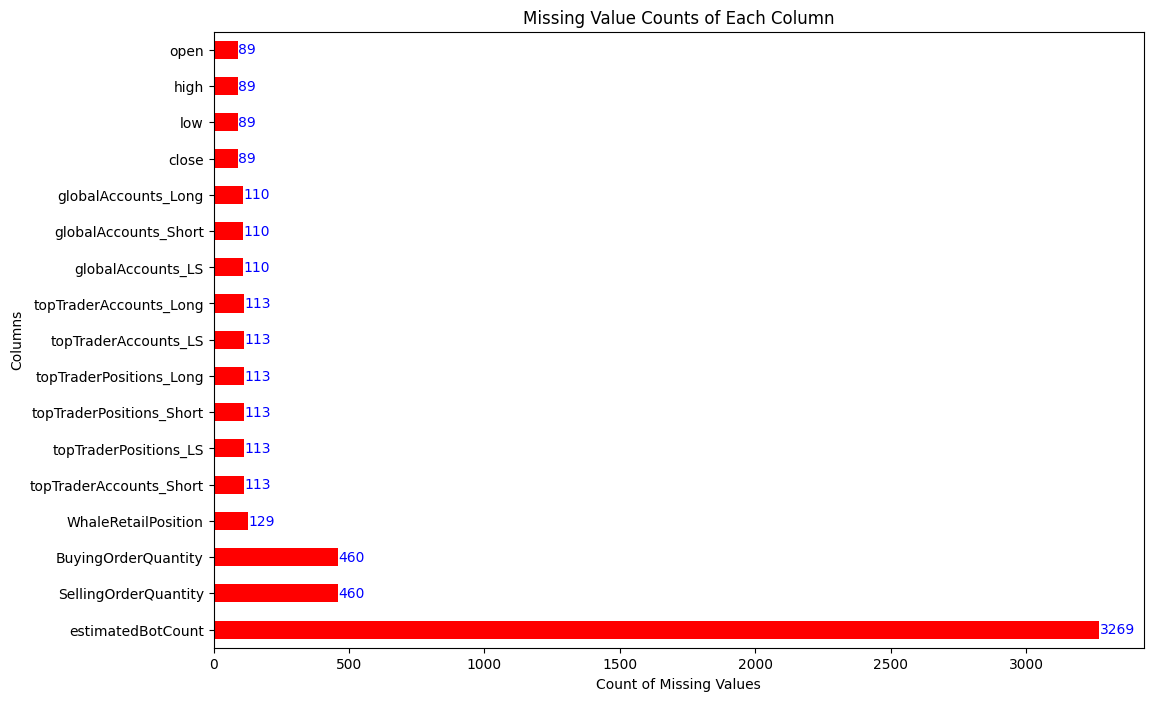

In [8]:
def visualize_missing_value_counts(df=bitcoin_df):
    # Plot bar chart to display missing value counts of features
    plt.figure(figsize=(12, 8))
    missing_values = df.isnull().sum().sort_values(ascending=False)
    missing_values.plot(kind='barh', color='red')
    
    # Adding instance count on the graph
    for i, v in enumerate(missing_values):
        plt.text(v + 1, i, str(v), color='blue', va='center')
    
    # Plot NaN value graph
    plt.xlabel('Count of Missing Values')
    plt.ylabel('Columns')
    plt.title('Missing Value Counts of Each Column')
    plt.show()

visualize_missing_value_counts()

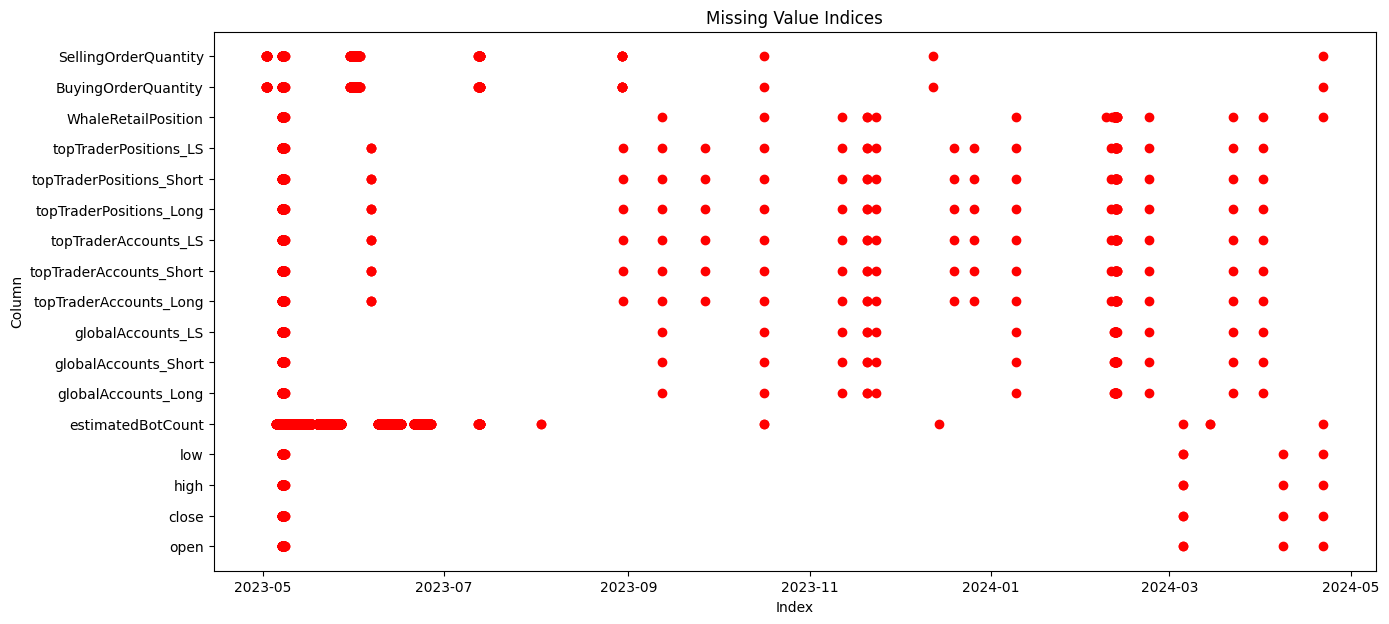

In [9]:
def visualize_missing_value_indexes(df=bitcoin_df):
    # Create a DataFrame to store missing value indices
    missing_indices = df.isnull().astype(int)
    
    # Plot missing value indices
    plt.figure(figsize=(15, 7))
    y_missing, y_non_missing = [], []
    for i, column in enumerate(df.columns):
        missing_values = missing_indices[column][missing_indices[column] == 1].index
        non_missing_values = missing_indices[column][missing_indices[column] == 0].index
        y_missing.extend([i] * len(missing_values))
        y_non_missing.extend([i + 0.5] * len(non_missing_values))
        plt.scatter(missing_values, [i] * len(missing_values), marker='o', color='red', label='Missing Values' if i == 0 else None)
    
    plt.yticks(range(len(df.columns)), df.columns)
    plt.title('Missing Value Indices')
    plt.xlabel('Index')
    plt.ylabel('Column')
    plt.show()

visualize_missing_value_indexes()

- **The API returns NaN when the system does not detect any bot at this interval, therefore we will fill the NaN values with 0 in the estimatedBotCount**
- **Most of the features have same consecutive NaN values at the end, therefore drop these rows**
- **Impute remain features with the linear interpolation**

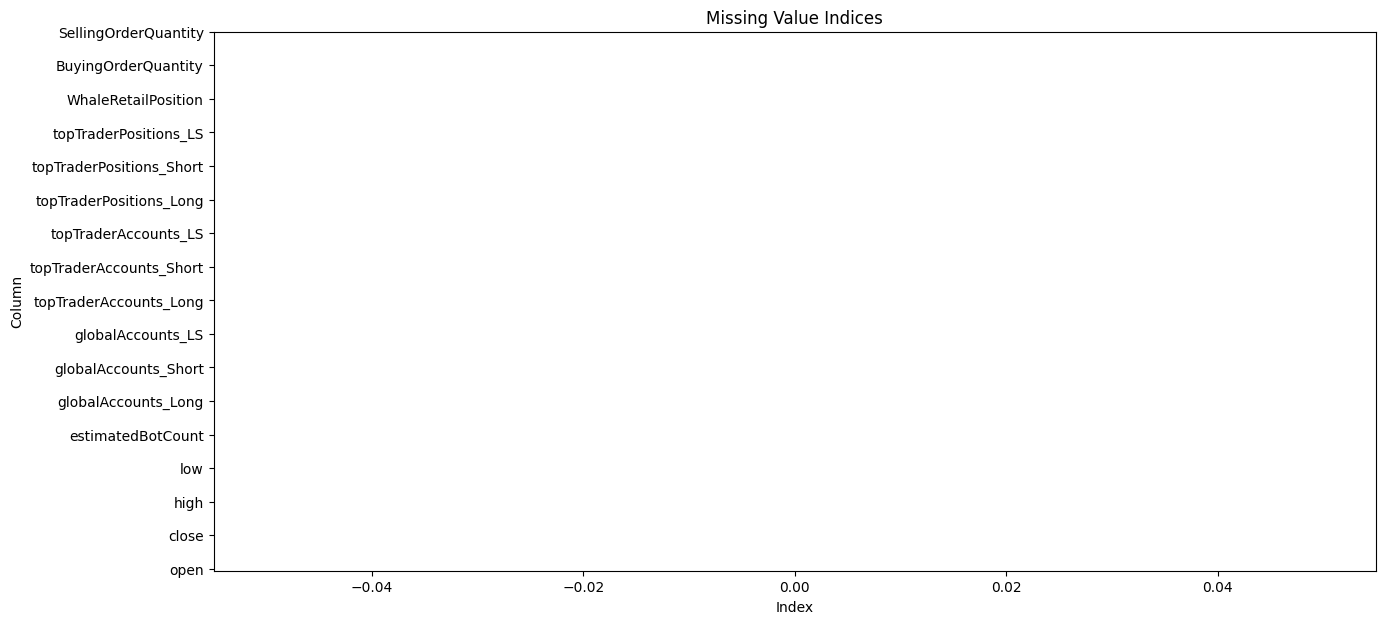

In [10]:
# Impute the NaN values of estimatedBotCount with 0
bitcoin_df.fillna({'estimatedBotCount': 0}, inplace=True)
# Choose the NaN values at the end using "open" feature as guidance
bitcoin_df.dropna(subset=["open"], inplace=True)
# Impute remain NaN values with linear interpolation
bitcoin_df.interpolate(method="linear", axis=0, inplace=True)

# Display NaN value counts after missing value handling
visualize_missing_value_indexes()

<a id=2.3></a>
## 2.3 Outlier Analysis

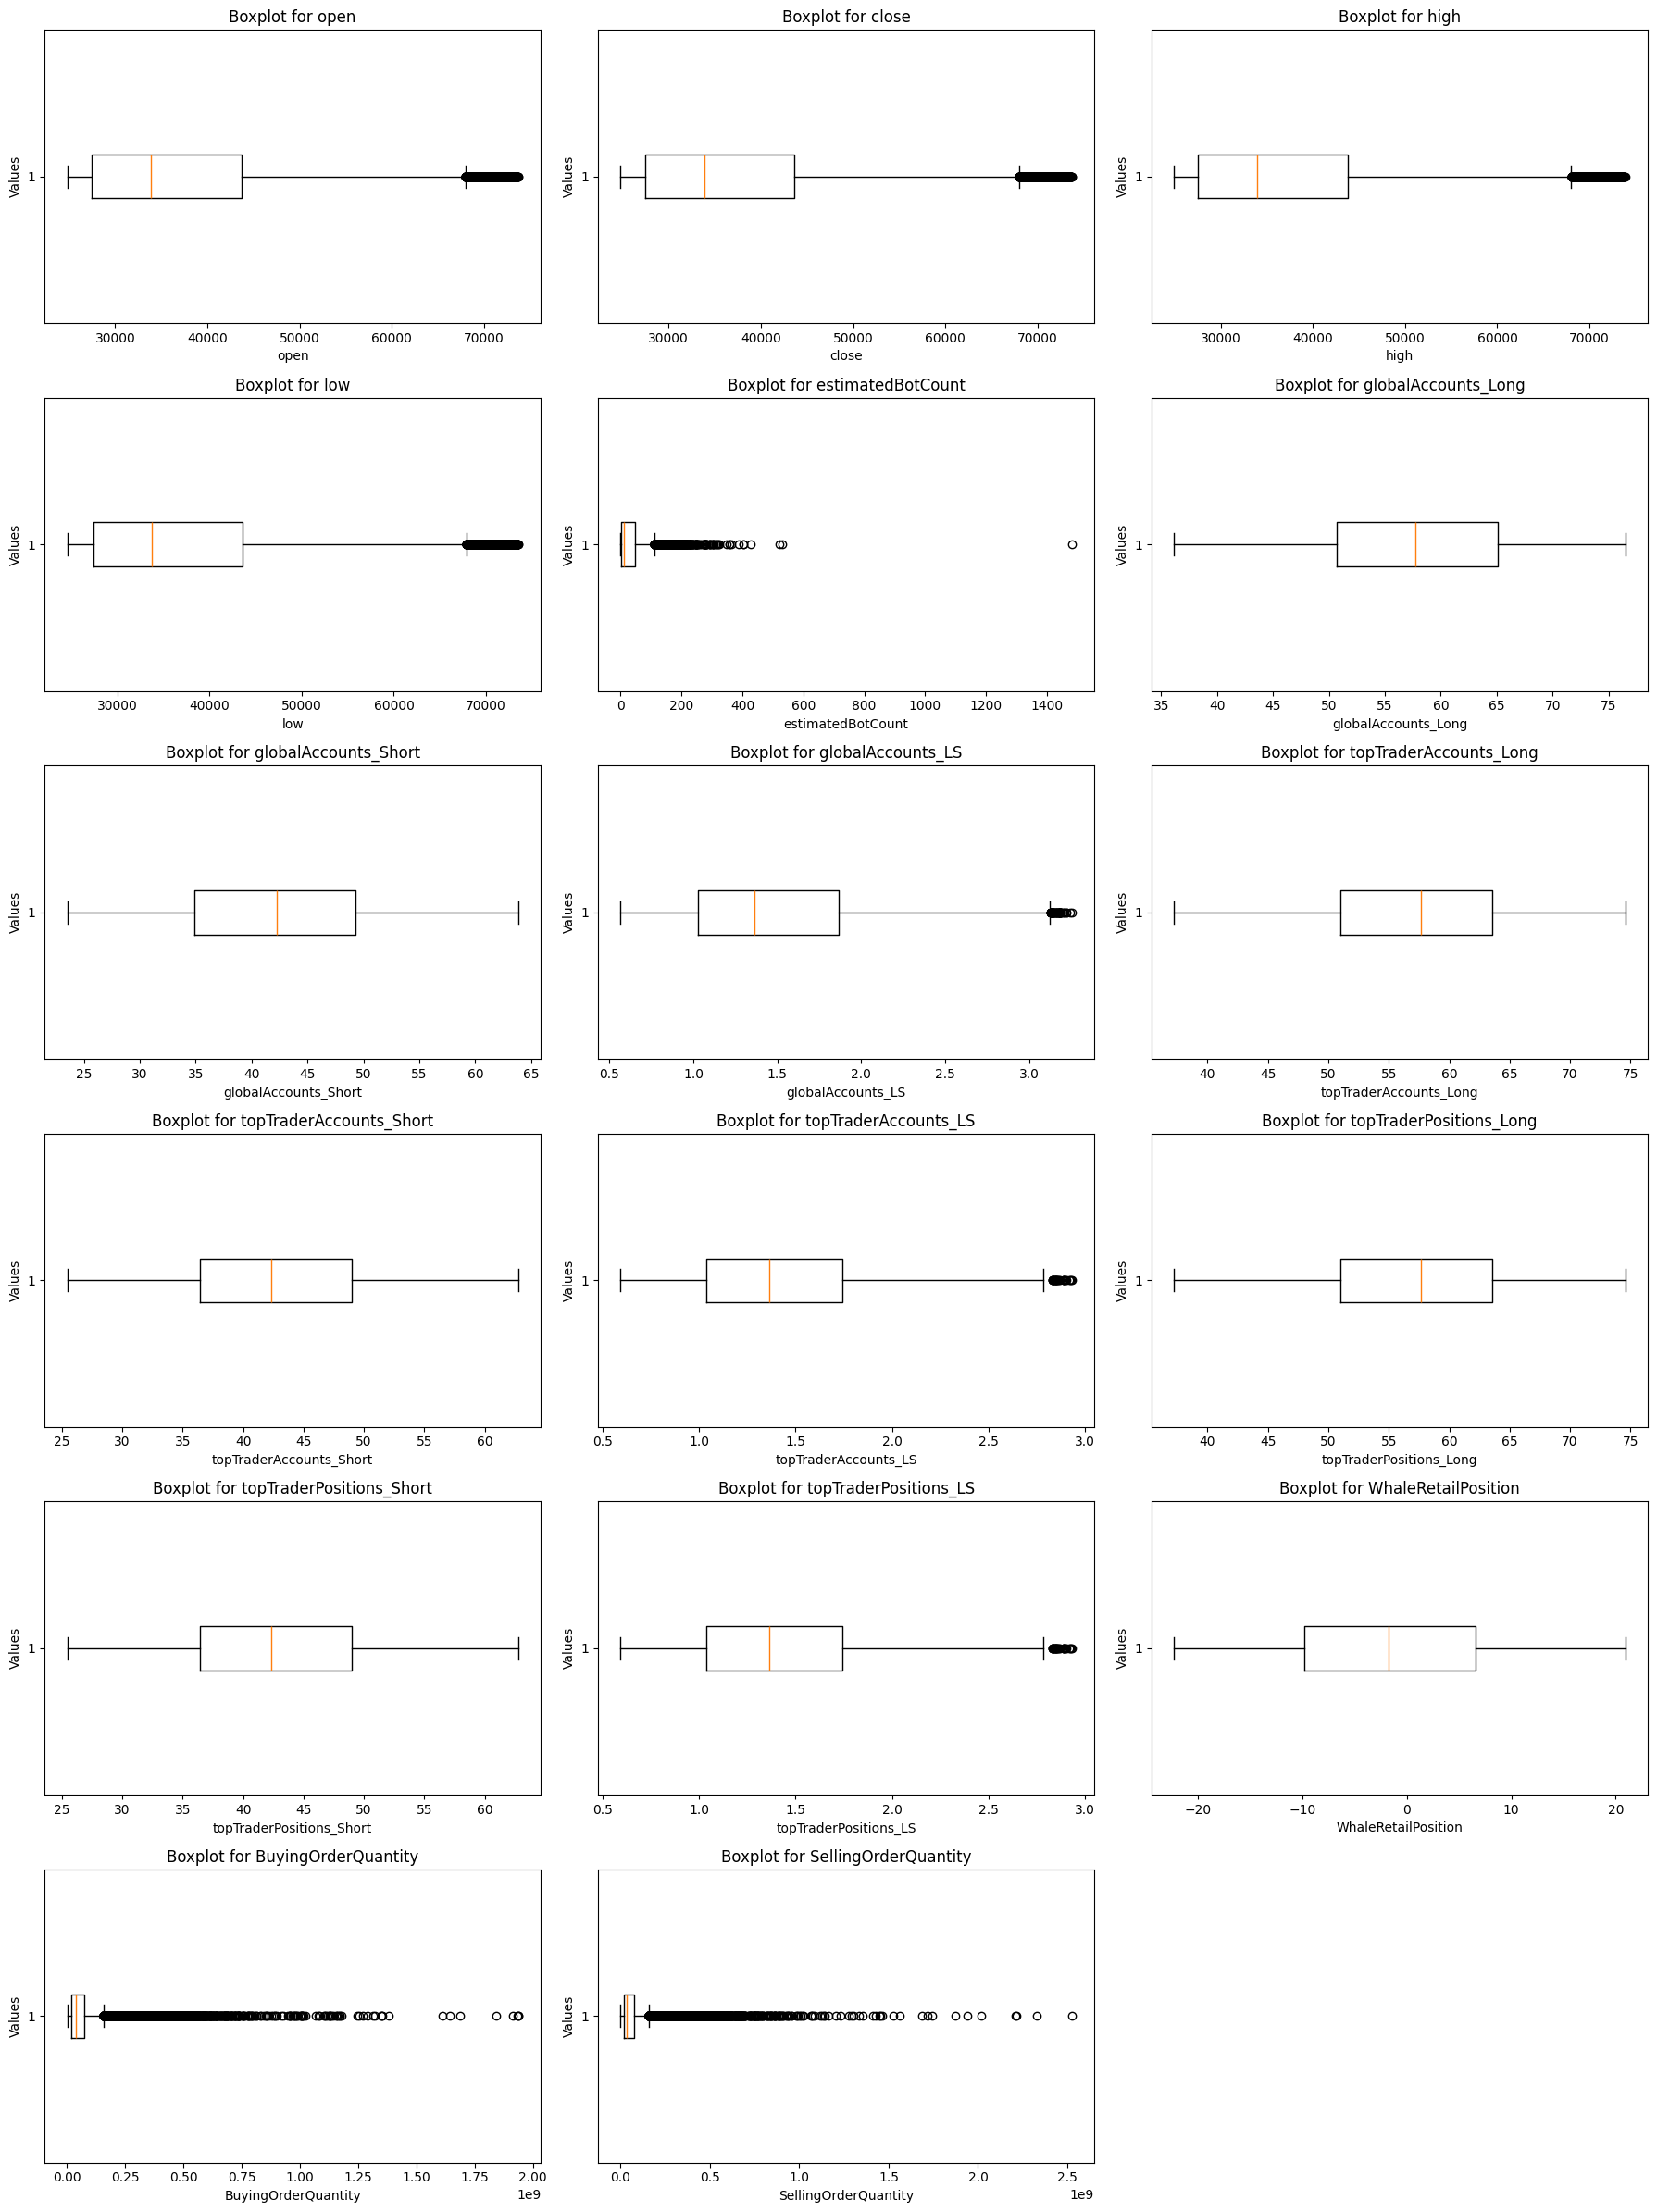

In [11]:
# Create a 6x3 grid of subplots
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(18, 24))

# Flatten the axes array
axes = axes.flatten()

# Plot each column in a separate subplot
for i, column in enumerate(bitcoin_df.columns):
    axes[i].boxplot(bitcoin_df[column], vert=False)
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Values')
    axes[i].set_title(f'Boxplot for {column}')

# Hide any extra subplots
for j in range(len(bitcoin_df.columns), len(axes)):
    axes[j].axis('off')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

**The boxplot figure demonstrated that some of the features have outliers but data that used for the project is time-series so, these points can be extrema. However, these outliers provide valuable insights into extreme market conditions and trading behaviors, while respecting the inherent volatility of cryptocurrency markets. Therefore, the outliers will be protected instead of dropping or smoothing them.**

<a id=2.4></a>
## 2.4 Feature Selection and Engineering

In [12]:
# Drop the features that have LS feature which represent the Long-Short ratio
bitcoin_df.drop(columns=["globalAccounts_Long", "globalAccounts_Short",
                         "topTraderAccounts_Long", "topTraderAccounts_Short",
                         "topTraderPositions_Long", "topTraderPositions_Short"], inplace=True)

# Check first 5 row of feature selected dataframe
display(bitcoin_df.head())

,open,close,high,low,estimatedBotCount,globalAccounts_LS,topTraderAccounts_LS,topTraderPositions_LS,WhaleRetailPosition,BuyingOrderQuantity,SellingOrderQuantity
Date,,,,,,,,,,,
2023-04-27 10:15:00+00:00,28959.3,28937.2,29000.0,28930.8,48.0,1.2257,1.1286,1.1286,-0.17,4.311050e+07,5.464228e+07
2023-04-27 10:30:00+00:00,28937.2,29006.8,29019.4,28937.0,44.0,1.2242,1.1281,1.1281,-0.12,5.897624e+07,3.443539e+07
2023-04-27 10:45:00+00:00,29006.8,28981.9,29029.0,28943.0,65.0,1.2282,1.1299,1.1299,-0.23,5.094587e+07,5.778385e+07
2023-04-27 11:00:00+00:00,28981.9,29077.6,29139.2,28960.0,53.0,1.2311,1.1299,1.1299,-0.30,2.054326e+08,1.598568e+08
2023-04-27 11:15:00+00:00,29077.6,29035.3,29084.6,29025.4,119.0,1.2743,1.1515,1.1515,-1.24,6.229194e+07,8.039308e+07


<a id=2.5></a>
## 2.5 Splitting Data Into Train, Validation and Test

In [13]:
def train_val_split(df, train_ratio = 0.9, val_ratio = 0.05):

    # Determine the sizes of each set
    total_samples = len(df)
    train_size = int(total_samples * train_ratio)  # 90% for training
    val_size = int(total_samples * val_ratio)   # 5% for validation
    test_size = total_samples - train_size - val_size # 5% for testing

    # Split the DataFrame
    train_df = df.iloc[:train_size]
    val_df = df.iloc[train_size:train_size + val_size]
    test_df = df.iloc[train_size + val_size:]

    return train_df, val_df, test_df


bitcoin_df.index = pd.to_datetime(bitcoin_df.index)
bitcoin_df = bitcoin_df.asfreq('15min')
bitcoin_df.interpolate(method="linear", axis=0, inplace=True)  # NaN values due to mismatch in time frequency using interpolation (35 per feature)

train_df_original, val_df_original, test_df_original = train_val_split(bitcoin_df)

print(f"Training set size: {len(train_df_original)}")
print(f"Validation set size: {len(val_df_original)}")
print(f"Test set size: {len(test_df_original)}")

Training set size: 31134
Validation set size: 1729
Test set size: 1731


<a id=2.6></a>
## 2.6 Scaling Data

In [14]:
# Extract column names
column_names = train_df_original.columns

# Initialize the scaler
scaler = MinMaxScaler()

# Scale the data
train_scaled = scaler.fit_transform(train_df_original)
val_scaled = scaler.transform(val_df_original)
test_scaled = scaler.transform(test_df_original)

# Create new DataFrames with scaled data and original column names
train_df = pd.DataFrame(train_scaled, columns=column_names, index=train_df_original.index)
val_df = pd.DataFrame(val_scaled, columns=column_names, index=val_df_original.index)
test_df = pd.DataFrame(test_scaled, columns=column_names, index=test_df_original.index)

<a id=2.7></a>
## 2.7 Splitting Target and Input Features

In [15]:
# Training set
X_train = train_df.drop(columns=['close'])
y_train = train_df['close']

# Validation set
X_val = val_df.drop(columns=['close'])
y_val = val_df['close']

# Test set
X_test = test_df.drop(columns=['close'])
y_test = test_df['close']

In [16]:
X_train.index[0],  X_val.index[0], X_test.index[0]

(Timestamp('2023-04-27 10:15:00+0000', tz='UTC'),
 Timestamp('2024-03-16 17:45:00+0000', tz='UTC'),
 Timestamp('2024-04-03 18:00:00+0000', tz='UTC'))

<a id=3></a>
# 3. METHODOLOGY

In [69]:
# Window generator
def sliding_window_generator(x_df, y_df, window_size, step_size, forecast_horizon=1):
    """
    Generate sliding windows from two pandas DataFrames.

    Args:
        x_df (pandas.DataFrame): Input DataFrame.
        y_df (pandas.DataFrame): Output DataFrame.
        window_size (int): Size of the sliding window.
        step_size (int): Step size for sliding the window.
        forecast_horizon (int): Number of steps to forecast into the future.

    Returns:
        tuple: Tuple containing two numpy.ndarrays:
               - seq_x: Input sequences
               - seq_y: Corresponding output sequences
    """
    x_data = x_df.values
    y_data = y_df.values
    num_samples = len(x_data)
    seq_x, seq_y = [], []
    for i in range(0, num_samples - window_size - forecast_horizon + 1, step_size):
        x_window = x_data[i:i + window_size]
        y_window = y_data[i + window_size:i + window_size + forecast_horizon]
        seq_x.append(x_window)  # Input sequence
        seq_y.append(y_window)  # Corresponding output
    return np.array(seq_x), np.array(seq_y)


# For drawing predictions vs truth graph.
def plot_predictions(truth, preds):
    plt.figure(figsize=(10, 6))
    plt.plot(truth, label='Actual', color='blue')
    plt.plot(preds, label='Predicted', color='red')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.title('Test Predictions vs Actual')
    plt.legend()
    plt.grid(True)
    plt.show()


def evaluate_predictions(model_name, truth, preds):
    # Convert inputs to numpy arrays
    truth = np.array(truth)
    preds = np.array(preds)

    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(truth, preds))

    # Calculate MAE
    mae = mean_absolute_error(truth, preds)

    # Calculate R2
    r2 = r2_score(truth, preds)

    # Print the evaluation metrics
    print(f"Evaluation Metrics of {model_name}:\n"
      "----------------------------------------")
    print("Root Mean Squared Error (RMSE): {:.4f}".format(rmse))
    print("Mean Absolute Error (MAE): {:.4f}".format(mae))
    print("R-squared (R2) Score: {:.4f}".format(r2))


<a id=3.1></a>
## 3.1 Machine Learning Models

<a id=3.1.1></a>
### 3.1.1 Linear Regression Model

In [19]:
# Generate sliding window data
train_seq_x, train_seq_y = sliding_window_generator(X_train, y_train, window_size=1, step_size=1,forecast_horizon=1)
val_seq_x, val_seq_y = sliding_window_generator(X_val, y_val,  window_size=1, step_size=1,forecast_horizon=1)
test_seq_x, test_seq_y = sliding_window_generator(X_test, y_test,  window_size=1, step_size=1,forecast_horizon=1)

# Initialize Linear Regressor
lin_reg = LinearRegression()

# Train the Linear Regression model
lin_reg.fit(train_seq_x.reshape(len(train_seq_x), -1), train_seq_y)

# Make predictions on the test set
y_pred_lin = lin_reg.predict(test_seq_x.reshape(len(test_seq_x), -1))

Evaluation Metrics of Linear Regression Model:
----------------------------------------
Root Mean Squared Error (RMSE): 0.0051
Mean Absolute Error (MAE): 0.0034
R-squared (R2) Score: 0.9931


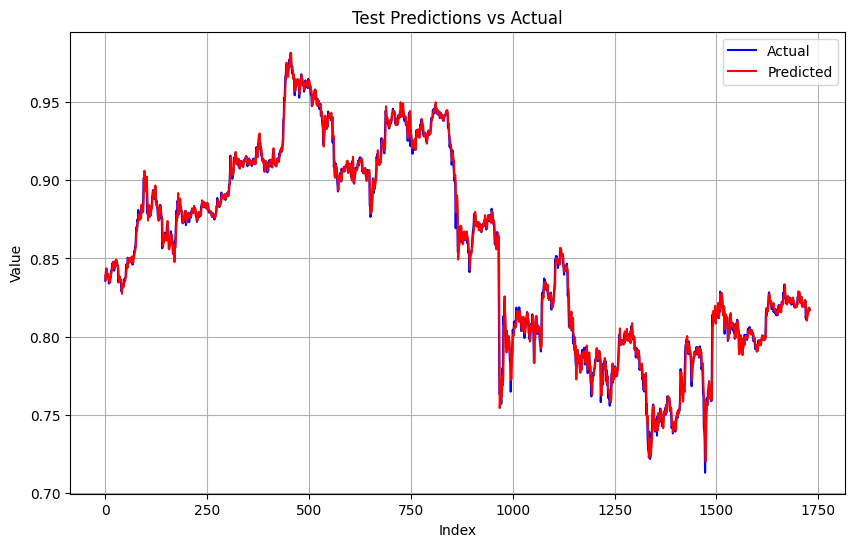

In [20]:
# Evaluation of Predictions
evaluate_predictions("Linear Regression Model", test_seq_y, y_pred_lin)

# Plot predictions
plot_predictions(test_seq_y, y_pred_lin)

<a id=3.1.2></a>
### 3.1.2 Random Forest Regression Model

In [23]:
# Generate sliding window data
train_seq_x, train_seq_y = sliding_window_generator(X_train, y_train, window_size=1, step_size=1,forecast_horizon=1)
val_seq_x, val_seq_y = sliding_window_generator(X_val, y_val,  window_size=1, step_size=1,forecast_horizon=1)
test_seq_x, test_seq_y = sliding_window_generator(X_test, y_test,  window_size=1, step_size=1,forecast_horizon=1)

# Initialize Random Forest regressor
rf_reg = RandomForestRegressor(
    n_estimators=100,
    max_depth=35,
    min_samples_split=18,
    min_samples_leaf=10,
    random_state=42
)

# Train the Random Forest model
rf_reg.fit(train_seq_x.reshape(len(train_seq_x), -1), train_seq_y.ravel())

# Make predictions on the test set
y_pred_rf = rf_reg.predict(test_seq_x.reshape(len(test_seq_x), -1))

Evaluation Metrics of Random Forest Regression Model:
----------------------------------------
Root Mean Squared Error (RMSE): 0.0059
Mean Absolute Error (MAE): 0.0039
R-squared (R2) Score: 0.9909


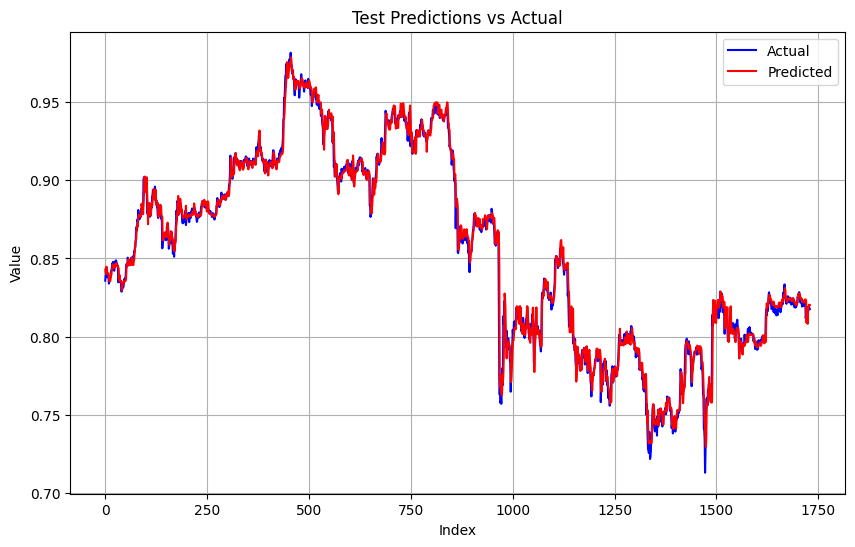

In [24]:
# Evaluation of Predictions
evaluate_predictions("Random Forest Regression Model", test_seq_y, y_pred_rf)

# Plot predictions
plot_predictions(test_seq_y, y_pred_rf)

<a id=3.1.3></a>
### 3.1.3 XGBoost Regression Model

In [24]:
# Generate sliding window data
train_seq_x, train_seq_y = sliding_window_generator(X_train, y_train, 1, 1)
val_seq_x, val_seq_y = sliding_window_generator(X_val, y_val, 1, 1)
test_seq_x, test_seq_y = sliding_window_generator(X_test, y_test, 1, 1)

# Initialize XGBoost regressor
xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', seed=42,
                           early_stopping_rounds=25)

# Train the XGBoost model with early stopping based on the validation set
xgb_reg.fit(train_seq_x.reshape(len(train_seq_x), -1), train_seq_y,
             eval_set=[(val_seq_x.reshape(len(val_seq_x), -1), val_seq_y)], verbose=0)

# Make predictions on the test set
y_pred = xgb_reg.predict(test_seq_x.reshape(len(test_seq_x), -1))

Evaluation Metrics of XGBoost Regression Model:
----------------------------------------
Root Mean Squared Error (RMSE): 0.0129
Mean Absolute Error (MAE): 0.0094
R-squared (R2) Score: 0.9566


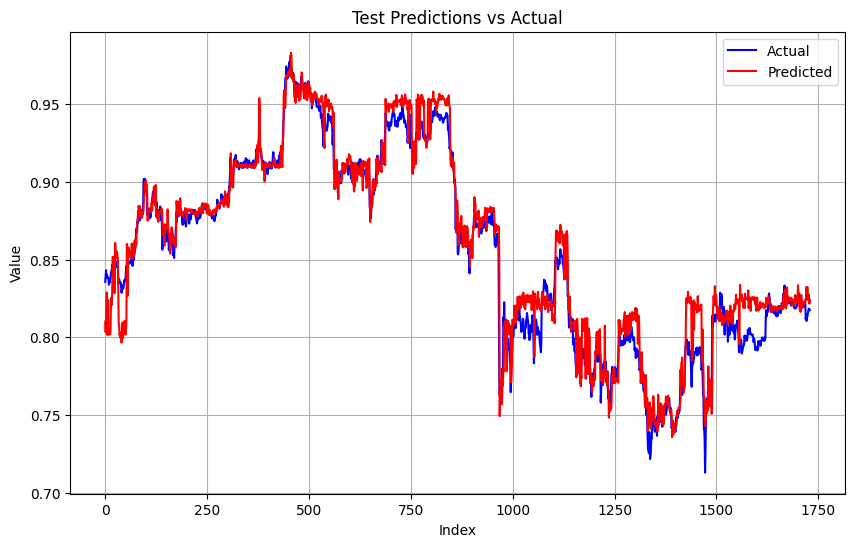

In [25]:
# Evaluation of Predictions
evaluate_predictions("XGBoost Regression Model", test_seq_y, y_pred)

# Plot predictions
plot_predictions(test_seq_y, y_pred)

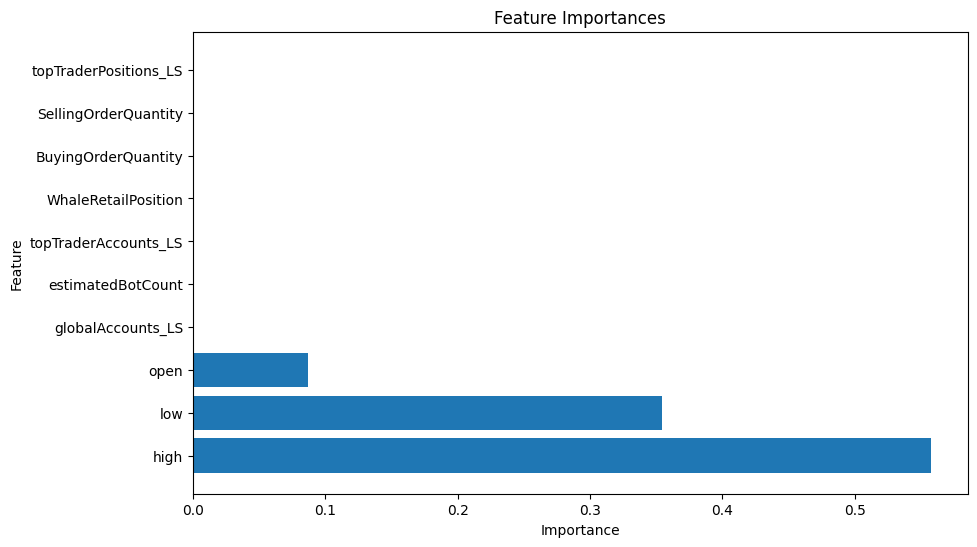

In [26]:
# Get feature names from X_test (assuming X_test is a pandas DataFrame)
feature_names = X_test.columns.tolist()

# Get feature importances and zip them with feature names
feature_importances = xgb_reg.feature_importances_
feature_importances_with_names = list(zip(feature_names, feature_importances))

# Sort feature importances by importance value
feature_importances_with_names.sort(key=lambda x: x[1], reverse=True)

# Visualize feature importances
importance_df = pd.DataFrame(feature_importances_with_names, columns=['Feature', 'Importance'])
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

<a id=3.2></a>
## 3.2 Traditional Forecasting Models

<a id=3.2.1></a>
### 3.2.1 SARIMAX (Seasonal Autoregressive Integrated Moving Average Exogenous) Model

In [27]:
# Get the best orders, including both non-seasonal and seasonal orders
stepwise_fit = auto_arima(y=y_train, seasonal=True)
best_order = stepwise_fit.order
best_seasonal_order = stepwise_fit.seasonal_order
print(f"Best order: {best_order}")
print(f"Best seasonal order: {best_seasonal_order}")

Best order: (1, 2, 5)
Best seasonal order: (0, 0, 0, 0)


In [30]:
# Train the model
order = (2, 1, 4)  # Example non-seasonal orders (p, d, q)
seasonal_order = (0, 0, 0, 0)  # Example seasonal orders (P, D, Q, m)
model = SARIMAX(
        y_train,
        exog=X_train,
        order=order,
        seasonal_order=seasonal_order
    )
model = model.fit()

# Make predictions on the test data
y_test_pred = model.forecast(exog=X_test, steps=len(X_test))

Evaluation Metrics of SARIMAX Model:
----------------------------------------
Root Mean Squared Error (RMSE): 0.0267
Mean Absolute Error (MAE): 0.0228
R-squared (R2) Score: 0.8132


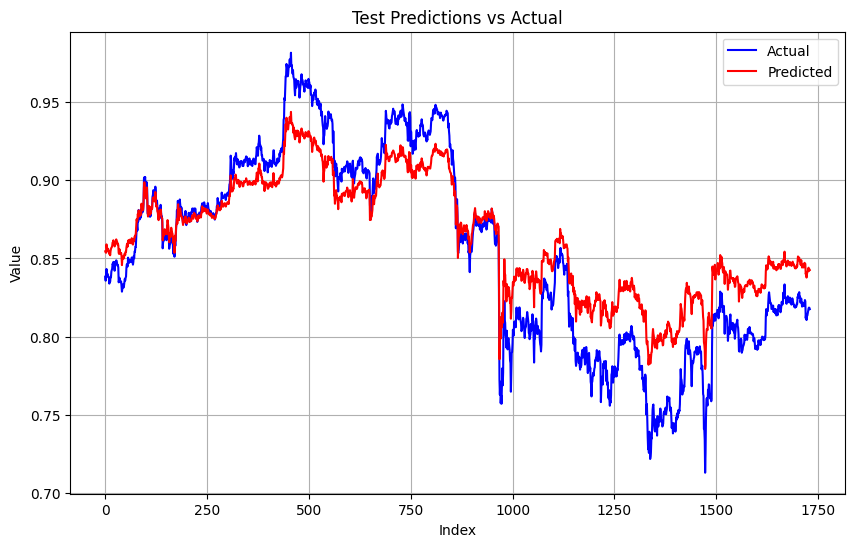

In [31]:
# Evaluation of predictions
evaluate_predictions("SARIMAX Model", y_test, y_test_pred)

# Plot predictions
plot_predictions(np.array(y_test), np.array(y_test_pred))

<a id=3.2.2 Prophet></a>
### 3.2.2 Prophet Model

In [32]:
# Copy original train_df to use further
prophet_df = train_df_original.copy()

In [33]:
# Preprocess the train data for prophet model
prophet_train = train_df_original.rename(columns={"close": "y"})
prophet_train["ds"] = train_df.index.tz_localize(None)
prophet_train.reset_index(drop=True, inplace=True)

# Use log-domain for prophet model
prophet_train["y_original"] = prophet_train["y"].copy()
prophet_train["y"] = np.log(prophet_train["y"])

# Display train data for prophet model
prophet_train.head(5)

,open,y,high,low,estimatedBotCount,globalAccounts_LS,topTraderAccounts_LS,topTraderPositions_LS,WhaleRetailPosition,BuyingOrderQuantity,SellingOrderQuantity,ds,y_original
0,28959.3,10.272883,29000.0,28930.8,48.0,1.2257,1.1286,1.1286,-0.17,4.311050e+07,5.464228e+07,2023-04-27 10:15:00,28937.2
1,28937.2,10.275286,29019.4,28937.0,44.0,1.2242,1.1281,1.1281,-0.12,5.897624e+07,3.443539e+07,2023-04-27 10:30:00,29006.8
2,29006.8,10.274427,29029.0,28943.0,65.0,1.2282,1.1299,1.1299,-0.23,5.094587e+07,5.778385e+07,2023-04-27 10:45:00,28981.9
3,28981.9,10.277723,29139.2,28960.0,53.0,1.2311,1.1299,1.1299,-0.30,2.054326e+08,1.598568e+08,2023-04-27 11:00:00,29077.6
4,29077.6,10.276268,29084.6,29025.4,119.0,1.2743,1.1515,1.1515,-1.24,6.229194e+07,8.039308e+07,2023-04-27 11:15:00,29035.3


In [34]:
# Build and train model
prophet_model = Prophet()

regressor_list = ['open', 'high', 'low', 'estimatedBotCount', 'globalAccounts_LS', 'topTraderAccounts_LS', 
                  'topTraderPositions_LS', 'WhaleRetailPosition', 'BuyingOrderQuantity', 'SellingOrderQuantity']

for regressor in regressor_list:
    prophet_model.add_regressor(regressor)

prophet_model.fit(prophet_train)

21:00:37 - cmdstanpy - INFO - Chain [1] start processing
21:01:03 - cmdstanpy - INFO - Chain [1] done processing


In [35]:
# Preprocess the test data to use for Prophet model
prophet_df = pd.concat([prophet_df, test_df_original], ignore_index=False)
prophet_df = prophet_df.rename(columns={"close": "y"})
prophet_df["ds"] = prophet_df.index.tz_localize(None)
prophet_df.reset_index(drop=True, inplace=True)

# Create future data for Prophet model
future_data = prophet_model.make_future_dataframe(periods=96, freq="15min")
future_data = prophet_df[['open', 'high', 'low', 'estimatedBotCount', 'globalAccounts_LS', 'topTraderAccounts_LS', 
                          'topTraderPositions_LS', 'WhaleRetailPosition', 'BuyingOrderQuantity', 'SellingOrderQuantity', 
                          'ds']]

future_data.head(5)

,open,high,low,estimatedBotCount,globalAccounts_LS,topTraderAccounts_LS,topTraderPositions_LS,WhaleRetailPosition,BuyingOrderQuantity,SellingOrderQuantity,ds
0,28959.3,29000.0,28930.8,48.0,1.2257,1.1286,1.1286,-0.17,4.311050e+07,5.464228e+07,2023-04-27 10:15:00
1,28937.2,29019.4,28937.0,44.0,1.2242,1.1281,1.1281,-0.12,5.897624e+07,3.443539e+07,2023-04-27 10:30:00
2,29006.8,29029.0,28943.0,65.0,1.2282,1.1299,1.1299,-0.23,5.094587e+07,5.778385e+07,2023-04-27 10:45:00
3,28981.9,29139.2,28960.0,53.0,1.2311,1.1299,1.1299,-0.30,2.054326e+08,1.598568e+08,2023-04-27 11:00:00
4,29077.6,29084.6,29025.4,119.0,1.2743,1.1515,1.1515,-1.24,6.229194e+07,8.039308e+07,2023-04-27 11:15:00


In [36]:
# Forecasting with test data
prophet_forecast_data = prophet_model.predict(future_data)

# Display the last 5 predictions
prophet_forecast_data[['open', 'high', 'low', 'estimatedBotCount', 'globalAccounts_LS', 'topTraderAccounts_LS', 
               'topTraderPositions_LS', 'WhaleRetailPosition', 'BuyingOrderQuantity', 'SellingOrderQuantity', 
               'ds']].tail(5)

,open,high,low,estimatedBotCount,globalAccounts_LS,topTraderAccounts_LS,topTraderPositions_LS,WhaleRetailPosition,BuyingOrderQuantity,SellingOrderQuantity,ds
32860,-0.152891,0.333316,0.365006,-0.000014,-0.002165,-0.001331,-0.001331,-0.002076,0.000073,0.000197,2024-04-21 17:30:00
32861,-0.153337,0.334127,0.366236,0.000059,-0.001796,-0.001460,-0.001460,-0.002422,-0.000505,0.000516,2024-04-21 17:45:00
32862,-0.153714,0.333998,0.364815,-0.000160,-0.002056,-0.001360,-0.001360,-0.002279,-0.000416,-0.000145,2024-04-21 18:00:00
32863,-0.153855,0.333679,0.365914,-0.000095,-0.002447,-0.001317,-0.001317,-0.001922,-0.000614,0.000436,2024-04-21 18:15:00
32864,-0.153803,0.333567,0.366284,0.000124,-0.002466,-0.001374,-0.001374,-0.002041,-0.001133,0.000756,2024-04-21 18:30:00


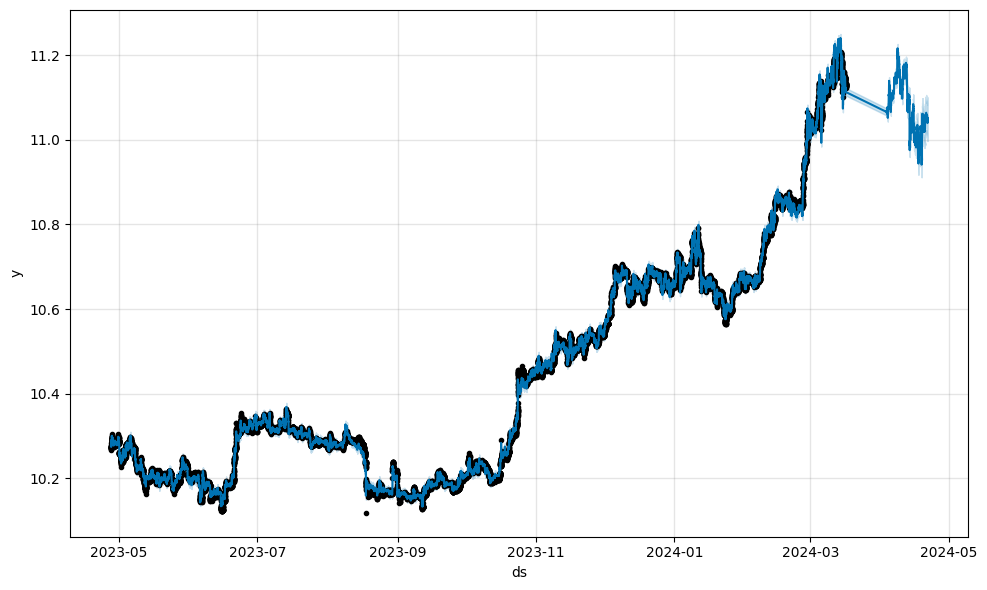

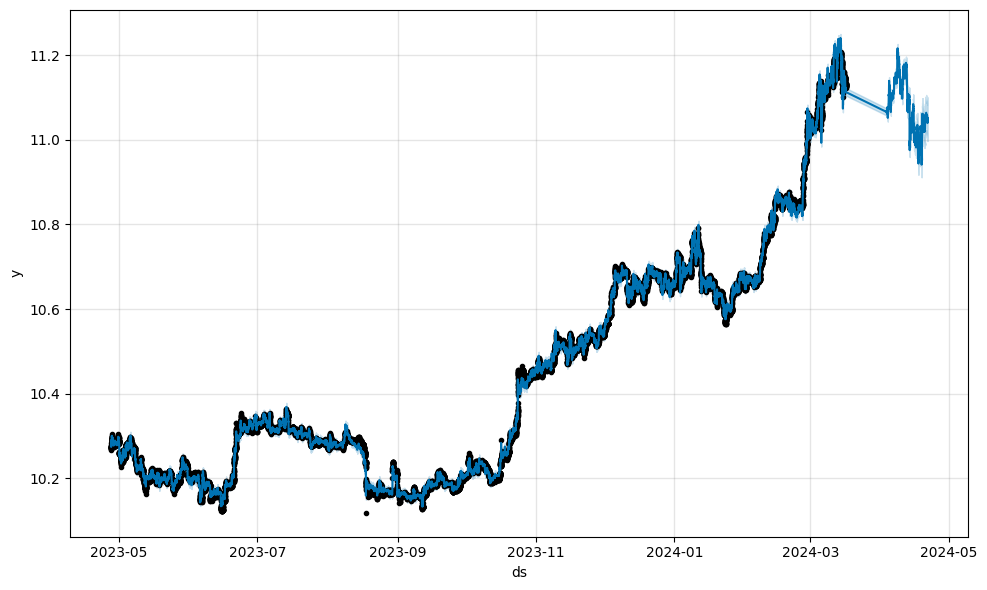

In [37]:
# Plot the information from Prophet model
prophet_model.plot(prophet_forecast_data)

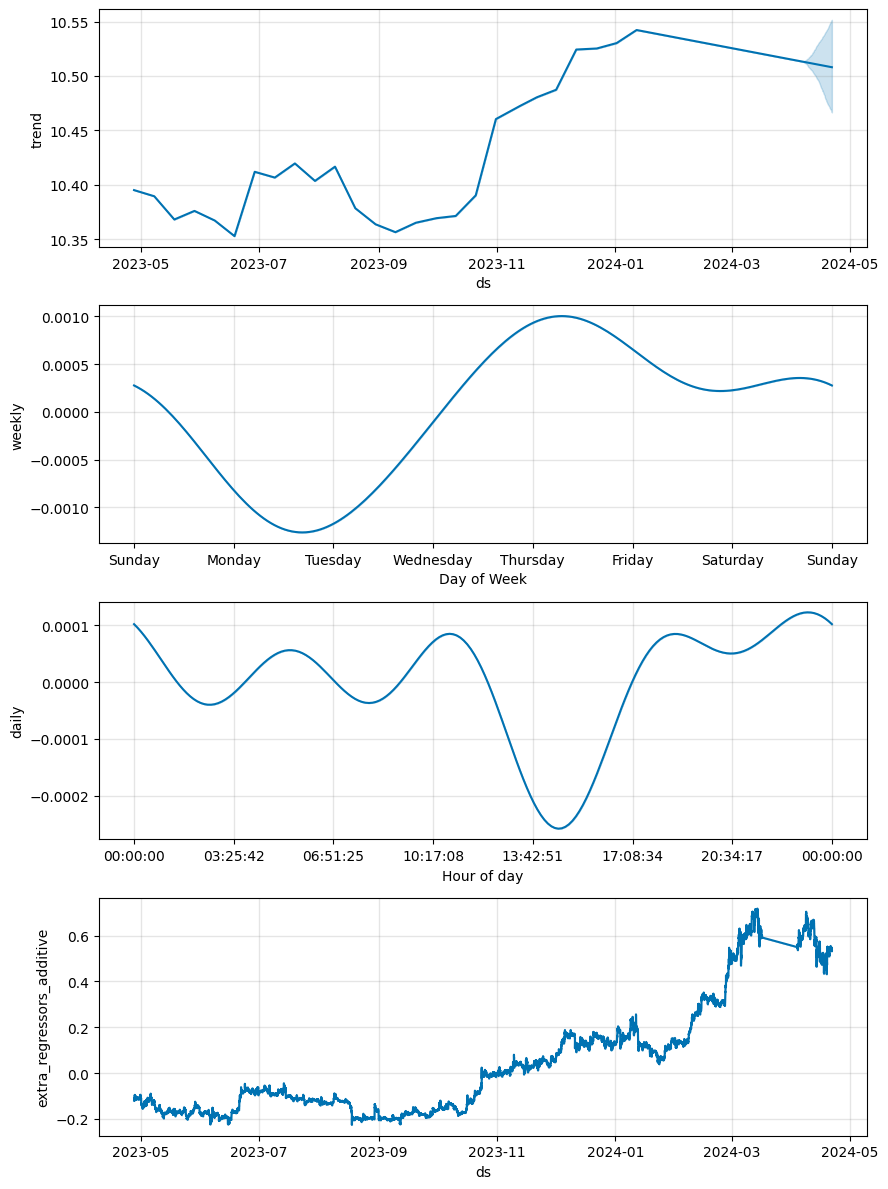

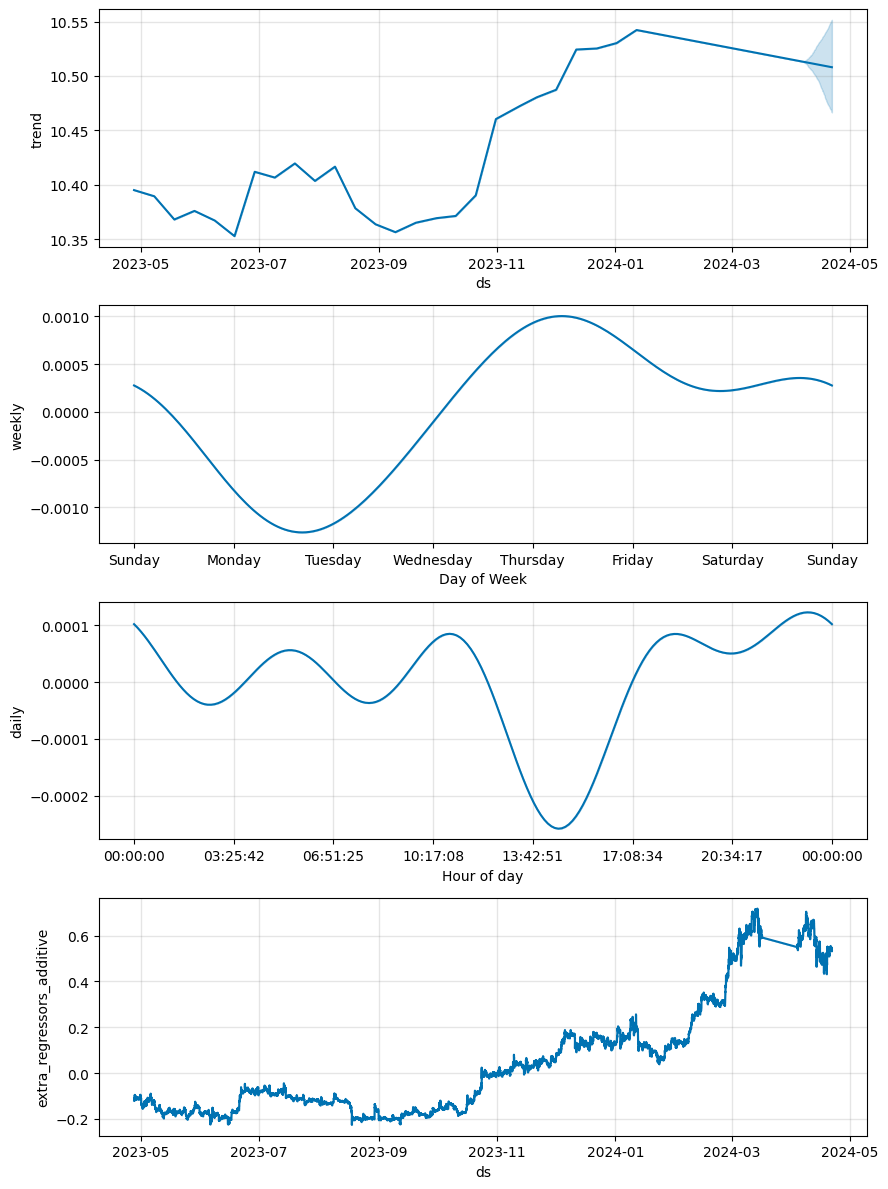

In [38]:
# Plot the Prophet model components
prophet_model.plot_components(prophet_forecast_data)

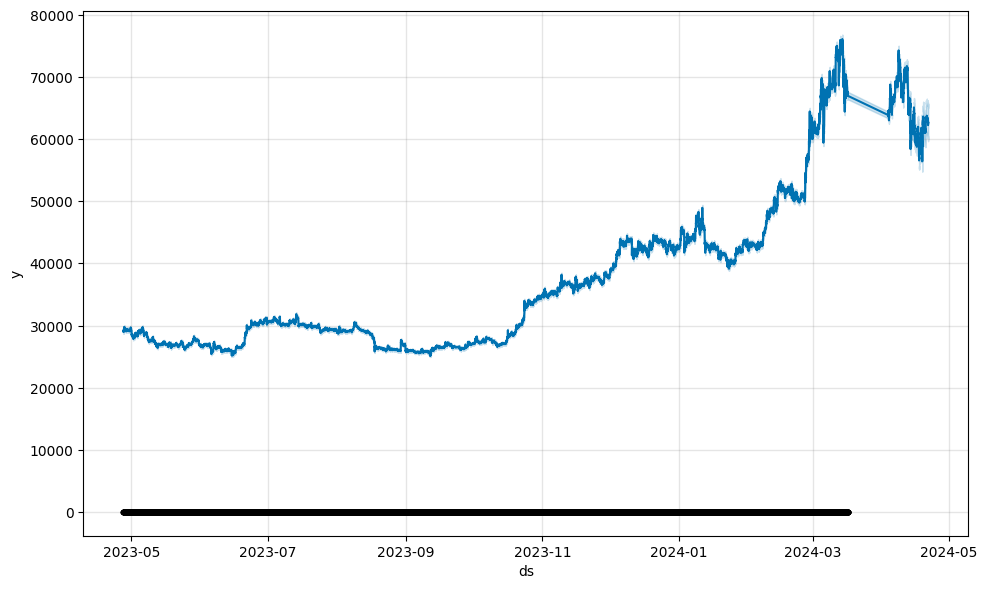

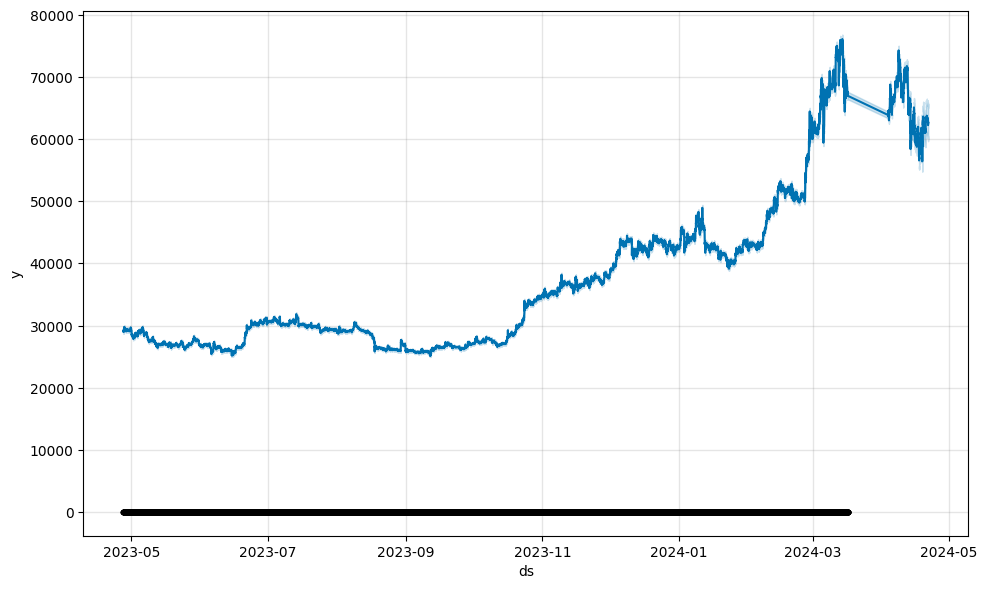

In [39]:
# Correct the log domain with exponential
prophet_forecast_data_original = prophet_forecast_data.copy()
prophet_forecast_data_original["yhat"] = np.exp(prophet_forecast_data_original["yhat"])
prophet_forecast_data_original["yhat_lower"] = np.exp(prophet_forecast_data_original["yhat_lower"])
prophet_forecast_data_original["yhat_upper"] = np.exp(prophet_forecast_data_original["yhat_upper"])
prophet_result_df = pd.DataFrame(prophet_forecast_data_original)

# Plot the exact prophet results without log domain
prophet_model.plot(prophet_forecast_data_original)

Evaluation Metrics of Prophet Model:
----------------------------------------
Root Mean Squared Error (RMSE): 1916.5396
Mean Absolute Error (MAE): 1912.3229
R-squared (R2) Score: -66.4424


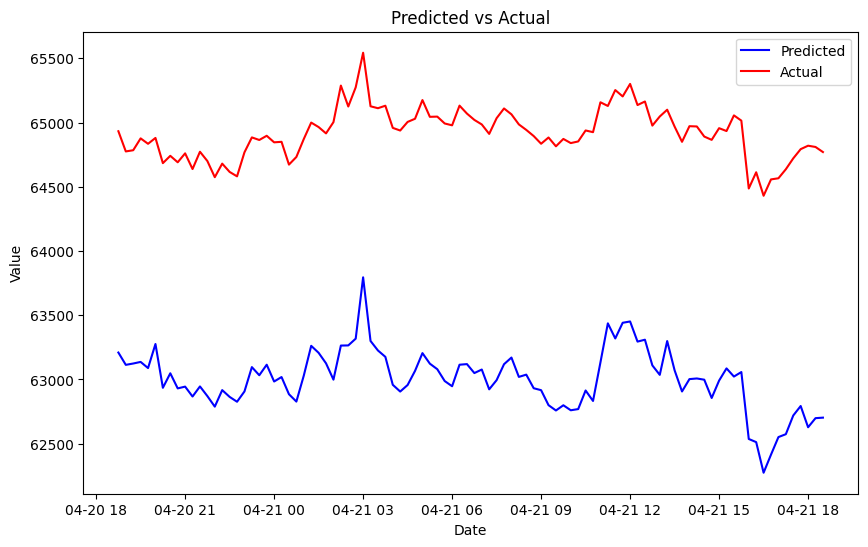

In [44]:
# Evaluation of predictions
evaluate_predictions("Prophet Model", prophet_result_df.iloc[-96:]["yhat"], test_df_original["close"].iloc[-96:])

# Plot the forecasting results of Prophet model
plt.figure(figsize=(10, 6))
plt.plot(prophet_result_df.iloc[-96:]["ds"], prophet_result_df.iloc[-96:]["yhat"], label="Predicted", color="blue")
plt.plot(prophet_result_df.iloc[-96:]["ds"], test_df_original["close"].iloc[-96:], label="Actual", color="red")
plt.xlabel("Date")
plt.ylabel("Value")
plt.title("Predicted vs Actual")
plt.legend()
plt.show()

<a id=3.3></a>
## 3.3 Deep Learning Models

<a id=3.3.1></a>
### 3.3.1 LSTM-FCN

In [45]:
class LSTM_FCN_Model:

    def __init__(self, input_shape, num_classes, lstm_units=256, conv_filters=128, kernel_size=7):
        self.input_shape = input_shape
        self.num_classes = num_classes
        self.lstm_units = lstm_units
        self.conv_filters = conv_filters
        self.kernel_size = kernel_size

    def build_model(self):
        inputs = tf.keras.layers.Input(shape=self.input_shape)

        # LSTM layer
        lstm_out = tf.keras.layers.LSTM(self.lstm_units)(inputs)
        lstm_out = tf.keras.layers.Dropout(0.25)(lstm_out)

        # Permute layer
        permute_out = tf.keras.layers.Permute((2, 1))(inputs)

        # Convolutional layers
        conv_out = tf.keras.layers.Conv1D(self.conv_filters, self.kernel_size, padding='same', kernel_initializer='he_uniform')(permute_out)
        conv_out = tf.keras.layers.BatchNormalization()(conv_out)
        conv_out = tf.keras.layers.Activation('gelu')(conv_out)

        # Global average pooling layer
        conv_out = tf.keras.layers.GlobalAveragePooling1D()(conv_out)

        # Concatenate LSTM and Convolutional outputs
        combined_out = tf.keras.layers.concatenate([lstm_out, conv_out])

        # Output layer
        outputs = tf.keras.layers.Dense(self.num_classes)(combined_out)

        # Create model
        model = tf.keras.models.Model(inputs=inputs, outputs=outputs)

        return model

In [46]:
# Define parameters
window_size = 12
step_size = 1
input_shape = (window_size, 10)  # Define num_features
num_classes = 1  # regression problem

# Generate sliding window data
train_seq_x, train_seq_y = sliding_window_generator(X_train, y_train, window_size, step_size)
val_seq_x, val_seq_y = sliding_window_generator(X_val, y_val, window_size, step_size)
test_seq_x, test_seq_y = sliding_window_generator(X_test, y_test, window_size, step_size)


# Initialize and build the model
model = LSTM_FCN_Model(input_shape, num_classes).build_model()

# Define early stopping and learning rate scheduler callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.25, patience=5, verbose=1, min_lr=1e-7)


optimizer = tf.optimizers.Adam(learning_rate=1e-2)
# Compile the model
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mse'])

# Train the model
history = model.fit(train_seq_x, train_seq_y, validation_data=(val_seq_x, val_seq_y), epochs=200, batch_size=64,
                    callbacks=[early_stopping, lr_scheduler], verbose=1)

Epoch 1/200
487/487 [==============================] - 8s 8ms/step - loss: 0.0066 - mse: 0.0066 - val_loss: 0.0145 - val_mse: 0.0145 - lr: 0.0100
Epoch 2/200
487/487 [==============================] - 4s 8ms/step - loss: 6.6754e-04 - mse: 6.6754e-04 - val_loss: 4.0891e-04 - val_mse: 4.0891e-04 - lr: 0.0100
Epoch 3/200
487/487 [==============================] - 3s 7ms/step - loss: 4.8190e-04 - mse: 4.8190e-04 - val_loss: 0.0020 - val_mse: 0.0020 - lr: 0.0100
Epoch 4/200
487/487 [==============================] - 4s 7ms/step - loss: 5.4974e-04 - mse: 5.4974e-04 - val_loss: 0.0025 - val_mse: 0.0025 - lr: 0.0100
Epoch 5/200
487/487 [==============================] - 4s 8ms/step - loss: 3.8313e-04 - mse: 3.8313e-04 - val_loss: 0.0010 - val_mse: 0.0010 - lr: 0.0100
Epoch 6/200
487/487 [==============================] - 5s 9ms/step - loss: 2.3276e-04 - mse: 2.3276e-04 - val_loss: 7.5825e-05 - val_mse: 7.5825e-05 - lr: 0.0100
Epoch 7/200
487/487 [==============================] - 5s 9ms/step -

Epoch 44/200
487/487 [==============================] - 4s 9ms/step - loss: 5.5147e-05 - mse: 5.5147e-05 - val_loss: 3.6892e-05 - val_mse: 3.6892e-05 - lr: 6.1035e-07
Epoch 45/200
487/487 [==============================] - 5s 9ms/step - loss: 5.6861e-05 - mse: 5.6861e-05 - val_loss: 3.8074e-05 - val_mse: 3.8074e-05 - lr: 6.1035e-07
Epoch 46/200
485/487 [============================>.] - ETA: 0s - loss: 5.8097e-05 - mse: 5.8097e-05
Epoch 46: ReduceLROnPlateau reducing learning rate to 1.5258788721439487e-07.
487/487 [==============================] - 5s 9ms/step - loss: 5.8051e-05 - mse: 5.8051e-05 - val_loss: 3.8484e-05 - val_mse: 3.8484e-05 - lr: 6.1035e-07
Epoch 47/200
487/487 [==============================] - 5s 10ms/step - loss: 5.6491e-05 - mse: 5.6491e-05 - val_loss: 3.7220e-05 - val_mse: 3.7220e-05 - lr: 1.5259e-07
Epoch 48/200
487/487 [==============================] - 5s 9ms/step - loss: 5.7720e-05 - mse: 5.7720e-05 - val_loss: 3.7683e-05 - val_mse: 3.7683e-05 - lr: 1.5259e-0

In [47]:
# Evaluate the model
test_preds = model.predict(test_seq_x)
test_loss = model.evaluate(test_seq_x, test_seq_y, verbose=0)

54/54 [==============================] - 0s 3ms/step


Evaluation Metrics of LSTM-FCN Model:
----------------------------------------
Root Mean Squared Error (RMSE): 0.0063
Mean Absolute Error (MAE): 0.0043
R-squared (R2) Score: 0.9898


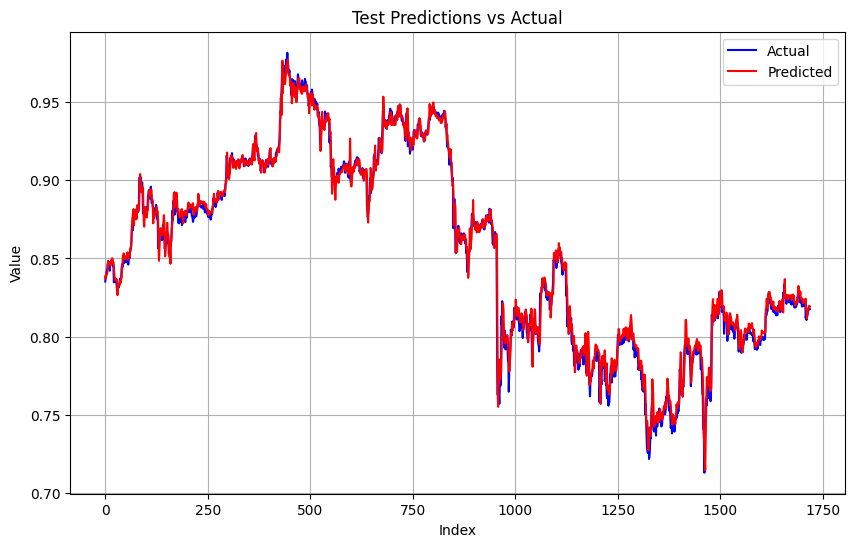

In [48]:
# Evaluation of predictions
evaluate_predictions("LSTM-FCN Model", test_seq_y, test_preds)

# Plot the predictions
plot_predictions(test_seq_y, test_preds)

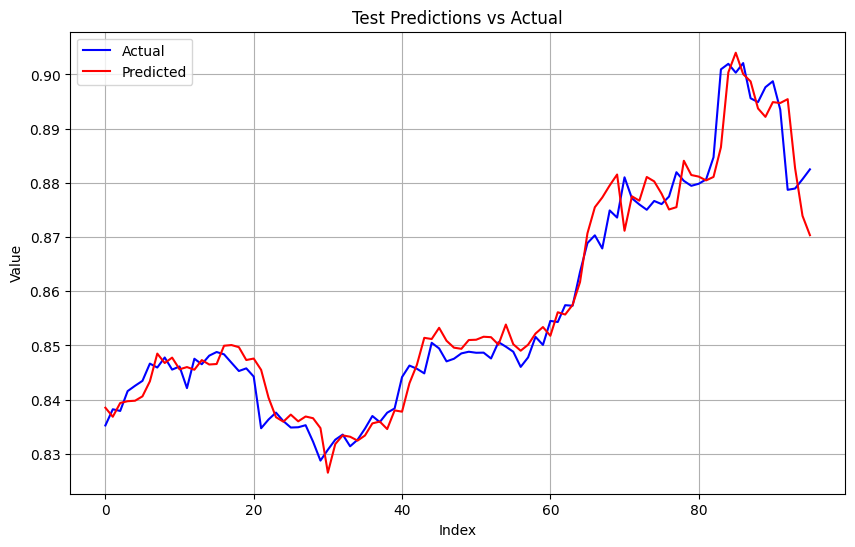

In [49]:
# First days prediction
plot_predictions(test_seq_y[:96], test_preds[:96])

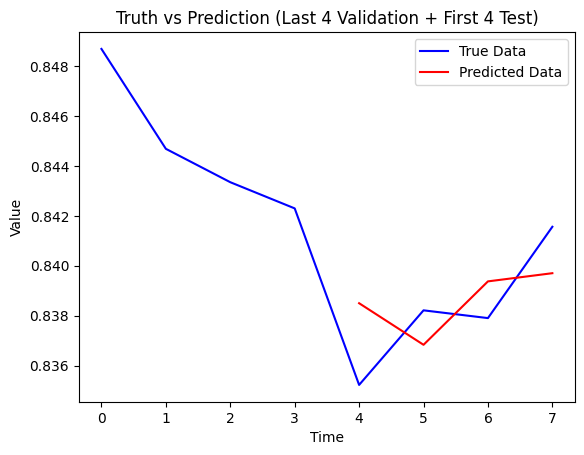

In [50]:
# Extracting the last 4 values of the validation sequence
val_last_4 = val_seq_y[-4:]

# Extracting the first 4 values of the test sequence
test_first_4 = test_seq_y[:4]

# Concatenating the last 4 values of the validation sequence with the first 4 values of the test sequence
truth_combined = np.concatenate((val_last_4, test_first_4), axis=0)

# Extracting the last 4 predicted values
pred_last_4 = test_preds[:4]

# Plotting
plt.plot(range(8), truth_combined, label='True Data', color='blue')
plt.plot(range(4, 8), pred_last_4, label='Predicted Data', color='red')

# Adding labels and legend
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Truth vs Prediction (Last 4 Validation + First 4 Test)')
plt.legend()

# Show plot
plt.show()

<a id=3.3.2></a>
### 3.3.2 FCN

In [51]:
class FCN(tf.keras.Model):
    def __init__(self, input_shape, layers=[128, 256, 128], kss=[7, 5, 3]):
        super(FCN, self).__init__()
        assert len(layers) == len(kss)
        self.convblock1 = self.conv_block(input_shape[-1], layers[0], kss[0])
        self.convblock2 = self.conv_block(layers[0], layers[1], kss[1])
        self.convblock3 = self.conv_block(layers[1], layers[2], kss[2])
        self.gap = tf.keras.layers.GlobalAveragePooling1D()
        self.fc = tf.keras.layers.Dense(1)

    def call(self, x):
        x = self.convblock1(x)
        x = self.convblock2(x)
        x = self.convblock3(x)
        x = self.gap(x)
        return self.fc(x)

    def conv_block(self, in_channels, filters, kernel_size):
        conv = tf.keras.layers.Conv1D(filters, kernel_size, padding='same', activation='relu')
        batchnorm = tf.keras.layers.BatchNormalization()
        return tf.keras.Sequential([conv, batchnorm])


In [52]:
# Define parameters
window_size = 12
step_size = 1
input_shape = (window_size, 10)  # Define num_features
num_classes = 1  # regression problem

# Generate sliding window data
train_seq_x, train_seq_y = sliding_window_generator(X_train, y_train, window_size, step_size)
val_seq_x, val_seq_y = sliding_window_generator(X_val, y_val, window_size, step_size)
test_seq_x, test_seq_y = sliding_window_generator(X_test, y_test, window_size, step_size)

# Initialize and build the model
model = FCN(input_shape)

# Define early stopping and learning rate scheduler callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.25, patience=5, verbose=1, min_lr=1e-7)


optim = tf.keras.optimizers.Adam(learning_rate=2e-4)
# Compile the model
model.compile(optimizer=optim, loss='mean_squared_error', metrics=['mse'])

# Train the model
history = model.fit(train_seq_x, train_seq_y, validation_data=(val_seq_x, val_seq_y), epochs=100, batch_size=64,
                    callbacks=[early_stopping, lr_scheduler], verbose=1)


Epoch 1/100
487/487 [==============================] - 5s 8ms/step - loss: 0.0132 - mse: 0.0132 - val_loss: 0.2652 - val_mse: 0.2652 - lr: 2.0000e-04
Epoch 2/100
487/487 [==============================] - 4s 8ms/step - loss: 0.0027 - mse: 0.0027 - val_loss: 0.0067 - val_mse: 0.0067 - lr: 2.0000e-04
Epoch 3/100
487/487 [==============================] - 4s 9ms/step - loss: 0.0019 - mse: 0.0019 - val_loss: 0.0049 - val_mse: 0.0049 - lr: 2.0000e-04
Epoch 4/100
487/487 [==============================] - 6s 12ms/step - loss: 0.0017 - mse: 0.0017 - val_loss: 0.0139 - val_mse: 0.0139 - lr: 2.0000e-04
Epoch 5/100
487/487 [==============================] - 6s 12ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0024 - val_mse: 0.0024 - lr: 2.0000e-04
Epoch 6/100
487/487 [==============================] - 6s 11ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0061 - val_mse: 0.0061 - lr: 2.0000e-04
Epoch 7/100
487/487 [==============================] - 5s 11ms/step - loss: 0.0014 - mse: 0.0014 

487/487 [==============================] - 5s 10ms/step - loss: 7.6086e-04 - mse: 7.6086e-04 - val_loss: 8.1546e-05 - val_mse: 8.1546e-05 - lr: 1.0000e-07
Epoch 46/100
487/487 [==============================] - 5s 11ms/step - loss: 7.3647e-04 - mse: 7.3647e-04 - val_loss: 8.0333e-05 - val_mse: 8.0333e-05 - lr: 1.0000e-07
Epoch 47/100
487/487 [==============================] - 5s 11ms/step - loss: 7.2424e-04 - mse: 7.2424e-04 - val_loss: 8.4158e-05 - val_mse: 8.4158e-05 - lr: 1.0000e-07
Epoch 48/100
487/487 [==============================] - 5s 11ms/step - loss: 8.5960e-04 - mse: 8.5960e-04 - val_loss: 9.0937e-05 - val_mse: 9.0937e-05 - lr: 1.0000e-07
Epoch 49/100
487/487 [==============================] - 5s 11ms/step - loss: 7.1702e-04 - mse: 7.1702e-04 - val_loss: 1.0613e-04 - val_mse: 1.0613e-04 - lr: 1.0000e-07
Epoch 50/100
487/487 [==============================] - 5s 11ms/step - loss: 7.3327e-04 - mse: 7.3327e-04 - val_loss: 8.5139e-05 - val_mse: 8.5139e-05 - lr: 1.0000e-07
Epoch

In [54]:
# Evaluate the model
test_preds = model.predict(test_seq_x)
test_loss = model.evaluate(test_seq_x, test_seq_y, verbose=0)

54/54 [==============================] - 0s 3ms/step


Evaluation Metrics of FCN Model:
----------------------------------------
Root Mean Squared Error (RMSE): 0.0113
Mean Absolute Error (MAE): 0.0083
R-squared (R2) Score: 0.9669


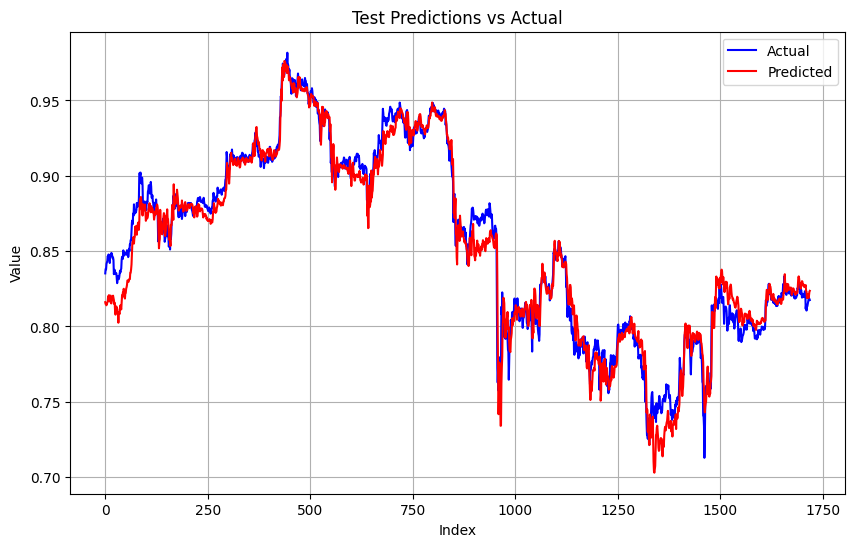

In [55]:
# Evaluation of predictions
evaluate_predictions("FCN Model", test_seq_y, test_preds)

# Plot predictions
plot_predictions(test_seq_y, test_preds)

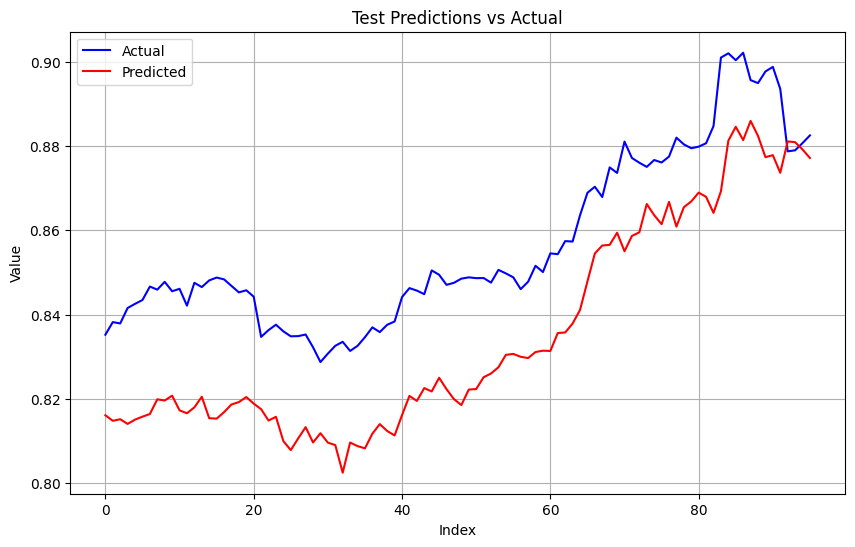

In [56]:
# First days prediction
plot_predictions(test_seq_y[:96], test_preds[:96])

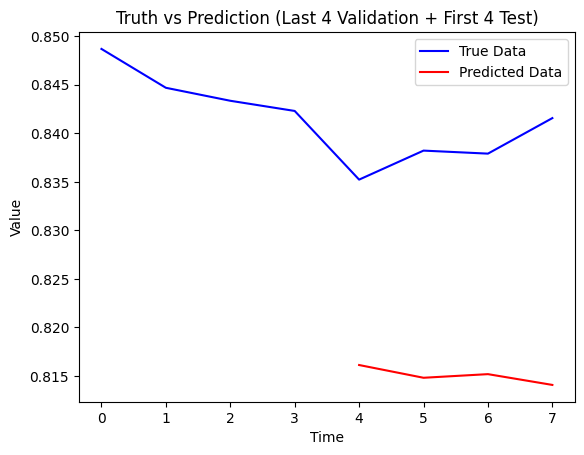

In [57]:
# Extracting the last 4 values of the validation sequence
val_last_4 = val_seq_y[-4:]

# Extracting the first 4 values of the test sequence
test_first_4 = test_seq_y[:4]

# Concatenating the last 4 values of the validation sequence with the first 4 values of the test sequence
truth_combined = np.concatenate((val_last_4, test_first_4), axis=0)

# Extracting the last 4 predicted values
pred_last_4 = test_preds[:4]

# Plotting
plt.plot(range(8), truth_combined, label='True Data', color='blue')
plt.plot(range(4, 8), pred_last_4, label='Predicted Data', color='red')

# Adding labels and legend
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Truth vs Prediction (Last 4 Validation + First 4 Test)')
plt.legend()

# Show plot
plt.show()

<a id=3.3.4></a>
### 3.3.4 Transformer Model

In [59]:
class TransformerModel(Module):
    def __init__(self, c_in, c_out, d_model=64, n_head=1, d_ffn=128, dropout=0.1, activation="relu", n_layers=1):
        """
        Args:
            c_in: the number of features (aka variables, dimensions, channels) in the time series dataset
            c_out: the number of target classes
            d_model: total dimension of the model.
            nhead:  parallel attention heads.
            d_ffn: the dimension of the feedforward network model.
            dropout: a Dropout layer on attn_output_weights.
            activation: the activation function of intermediate layer, relu or gelu.
            num_layers: the number of sub-encoder-layers in the encoder.
            
        Input shape:
            bs (batch size) x nvars (aka variables, dimensions, channels) x seq_len (aka time steps)
            """
        self.inlinear = nn.Linear(c_in, d_model)
        self.relu = nn.ReLU()
        encoder_layer = TransformerEncoderLayer(d_model, n_head, dim_feedforward=d_ffn, dropout=dropout, activation=activation)
        encoder_norm = nn.LayerNorm(d_model)        
        self.transformer_encoder = TransformerEncoder(encoder_layer, n_layers, norm=encoder_norm)
        self.transpose = Transpose(1, 0)
        self.max = Max(1)
        self.outlinear = nn.Linear(d_model, c_out)
        
    def forward(self,x):
        x = x.permute(dims=(1, 0, 2)) # bs x nvars x seq_len -> seq_len x bs x nvars
        x = self.inlinear(x) # seq_len x bs x nvars -> seq_len x bs x d_model
        x = self.relu(x)
        x = self.transformer_encoder(x)
        x = self.transpose(x) # seq_len x bs x d_model -> bs x seq_len x d_model
        x = self.max(x)
        x = self.relu(x)
        x = self.outlinear(x)
        return x

In [60]:
class TransformerDataGenerator(Dataset):
    
    def __init__(self, x, y):
        self.x = torch.tensor(x, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)
        
    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

In [61]:
# Generate sliding window data
train_seq_x, train_seq_y = sliding_window_generator(X_train, y_train, window_size=24, step_size=1)
val_seq_x, val_seq_y = sliding_window_generator(X_val, y_val, window_size=24, step_size=1)
test_seq_x, test_seq_y = sliding_window_generator(X_test, y_test, window_size=24, step_size=1)

train_data = TransformerDataGenerator(train_seq_x, train_seq_y)
val_data = TransformerDataGenerator(val_seq_x, val_seq_y)
test_data = TransformerDataGenerator(test_seq_x, test_seq_y)

train_loader = DataLoader(train_data, batch_size=128)
val_loader = DataLoader(val_data, batch_size=128)
test_loader = DataLoader(test_data, batch_size=128)

In [62]:
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("CUDA is available! Using GPU.")
else:
    device = torch.device("cpu")
    print("CUDA is not available. Using CPU.")


CUDA is available! Using GPU.


In [63]:
class EarlyStopping:
    def __init__(self, patience=10):
        self.patience = patience
        self.counter = 0
        self.best_val_loss = np.Inf
        self.best_model = None

    def __call__(self, val_loss, model):
        if val_loss <= self.best_val_loss:
            self.best_val_loss = val_loss
            self.best_model = model
            self.counter = 0
            return False
        else :
            self.counter +=1
            if self.counter == self.patience:
                print("Early Stopping ...")
                return True


In [107]:
n_vars = 10
c_out = 1
# Create Model
model = TransformerModel(n_vars, c_out, d_model=256, n_head=8, d_ffn=512, dropout=0.1, activation='gelu', n_layers=1)
model.to(device)

# Define your loss function
criterion = nn.MSELoss()

# Define your optimizer
optimizer = optim.Adam(model.parameters(), lr=1e-4)

# Define Earlystopping
early_stopping = EarlyStopping(patience=22)

# LR Scheduler
lr_scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode="min", patience=5, min_lr=1e-10)

# Define number of epochs
num_epochs = 150

# Training loop
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    train_loss = 0.0
    
    for train_batch_idx, (train_data, train_target) in enumerate(train_loader):
        train_data, train_target = train_data.to(device), train_target.to(device)
        optimizer.zero_grad()  # Zero the gradients
        output = model(train_data)  # Forward pass
        loss = criterion(output, train_target)  # Calculate the loss
        loss.backward()  # Backward pass
        optimizer.step()  # Update weights
        
        train_loss += loss.item() * train_data.size(0)
    
    # Calculate average training loss
    train_loss /= len(train_loader.dataset)
    
    # Validation loop
    model.eval()  # Set the model to evaluation mode
    val_loss = 0.0
    
    with torch.no_grad():
        for val_batch_idx, (val_data, val_target) in tqdm(enumerate(val_loader)):
            val_data, val_target = val_data.to(device), val_target.to(device)
            output = model(val_data)  # Forward pass
            loss = criterion(output, val_target)  # Calculate the loss
            val_loss += loss.item() * val_data.size(0)
    
    # Calculate average validation loss
    val_loss /= len(val_loader.dataset)

    # Check early stopping
    if early_stopping(val_loss, model):
        break

    # Schedule LR
    lr_scheduler.step(val_loss)
    print(f"Learning rate: {lr_scheduler.get_last_lr()}")
    # Print training and validation statistics
    print(f'Epoch: {epoch+1}/{num_epochs}, Train Loss: {train_loss:.6f}, Val Loss: {val_loss:.6f}')

# Get the best val loss model
model = early_stopping.best_model

C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\nn\modules\transformer.py:286: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
14it [00:00, 428.98it/s]


Learning rate: [0.0001]
Epoch: 1/150, Train Loss: 0.012947, Val Loss: 0.022909


14it [00:00, 410.89it/s]


Learning rate: [0.0001]
Epoch: 2/150, Train Loss: 0.009888, Val Loss: 0.009762


14it [00:00, 510.44it/s]


Learning rate: [0.0001]
Epoch: 3/150, Train Loss: 0.006407, Val Loss: 0.003852


14it [00:00, 474.17it/s]


Learning rate: [0.0001]
Epoch: 4/150, Train Loss: 0.005225, Val Loss: 0.001389


14it [00:00, 478.72it/s]


Learning rate: [0.0001]
Epoch: 5/150, Train Loss: 0.004335, Val Loss: 0.001331


14it [00:00, 471.54it/s]


Learning rate: [0.0001]
Epoch: 6/150, Train Loss: 0.002507, Val Loss: 0.001813


14it [00:00, 445.73it/s]


Learning rate: [0.0001]
Epoch: 7/150, Train Loss: 0.001473, Val Loss: 0.002942


14it [00:00, 499.05it/s]


Learning rate: [0.0001]
Epoch: 8/150, Train Loss: 0.001071, Val Loss: 0.002906


14it [00:00, 493.93it/s]


Learning rate: [0.0001]
Epoch: 9/150, Train Loss: 0.000925, Val Loss: 0.004046


14it [00:00, 481.87it/s]


Learning rate: [0.0001]
Epoch: 10/150, Train Loss: 0.000863, Val Loss: 0.003435


14it [00:00, 511.33it/s]


Learning rate: [1e-05]
Epoch: 11/150, Train Loss: 0.000889, Val Loss: 0.003315


14it [00:00, 514.77it/s]


Learning rate: [1e-05]
Epoch: 12/150, Train Loss: 0.001683, Val Loss: 0.020272


14it [00:00, 501.24it/s]


Learning rate: [1e-05]
Epoch: 13/150, Train Loss: 0.001311, Val Loss: 0.014334


14it [00:00, 484.06it/s]


Learning rate: [1e-05]
Epoch: 14/150, Train Loss: 0.000888, Val Loss: 0.012376


14it [00:00, 487.00it/s]


Learning rate: [1e-05]
Epoch: 15/150, Train Loss: 0.000724, Val Loss: 0.011534


14it [00:00, 510.96it/s]


Learning rate: [1e-05]
Epoch: 16/150, Train Loss: 0.000629, Val Loss: 0.010529


14it [00:00, 481.01it/s]


Learning rate: [1.0000000000000002e-06]
Epoch: 17/150, Train Loss: 0.000549, Val Loss: 0.010025


14it [00:00, 489.62it/s]


Learning rate: [1.0000000000000002e-06]
Epoch: 18/150, Train Loss: 0.000568, Val Loss: 0.008749


14it [00:00, 482.97it/s]


Learning rate: [1.0000000000000002e-06]
Epoch: 19/150, Train Loss: 0.000489, Val Loss: 0.009252


14it [00:00, 486.02it/s]


Learning rate: [1.0000000000000002e-06]
Epoch: 20/150, Train Loss: 0.000459, Val Loss: 0.009509


14it [00:00, 482.54it/s]


Learning rate: [1.0000000000000002e-06]
Epoch: 21/150, Train Loss: 0.000441, Val Loss: 0.009765


14it [00:00, 505.95it/s]


Learning rate: [1.0000000000000002e-06]
Epoch: 22/150, Train Loss: 0.000422, Val Loss: 0.009880


14it [00:00, 479.51it/s]


Learning rate: [1.0000000000000002e-07]
Epoch: 23/150, Train Loss: 0.000407, Val Loss: 0.009955


14it [00:00, 509.19it/s]


Learning rate: [1.0000000000000002e-07]
Epoch: 24/150, Train Loss: 0.000401, Val Loss: 0.009515


14it [00:00, 472.38it/s]


Learning rate: [1.0000000000000002e-07]
Epoch: 25/150, Train Loss: 0.000380, Val Loss: 0.009364


14it [00:00, 517.16it/s]


Learning rate: [1.0000000000000002e-07]
Epoch: 26/150, Train Loss: 0.000378, Val Loss: 0.009321


14it [00:00, 512.89it/s]

Early Stopping ...


Evaluation Metrics of TransformerModel:
----------------------------------------
Root Mean Squared Error (RMSE): 0.0815
Mean Absolute Error (MAE): 0.0770
R-squared (R2) Score: -0.7167


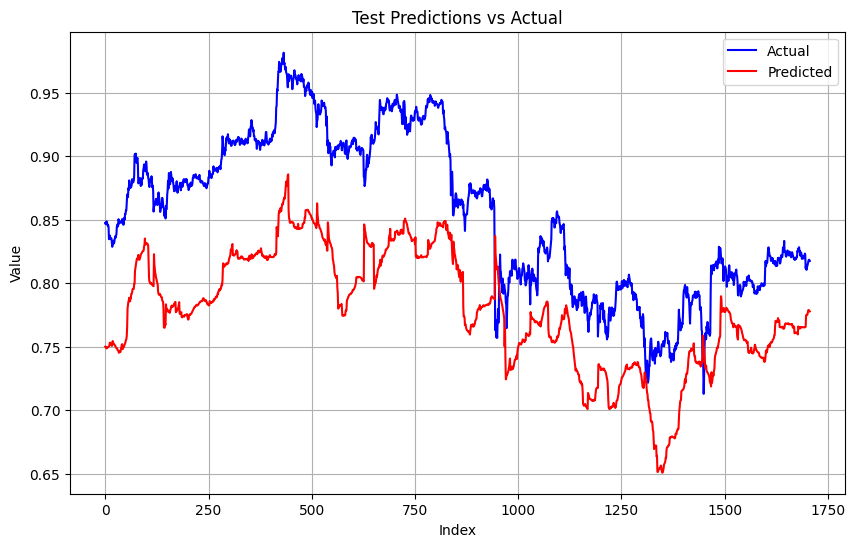

In [108]:
# Test loop
model.eval()  # Set the model to evaluation mode
test_loss = 0.0
predictions = []
ground_truth = []

with torch.no_grad():
    for test_batch_idx, (test_data, test_target) in enumerate(test_loader):
        test_data, test_target = test_data.to(device), test_target.to(device)
        output = model(test_data)  # Forward pass
        loss = criterion(output, test_target)  # Calculate the loss
        test_loss += loss.item() * test_data.size(0)
        predictions.append(output.cpu().numpy())  # Convert predictions to numpy array and append
        ground_truth.append(test_target.cpu().numpy())  # Convert ground truth to numpy array and append

# Concatenate predictions and ground truth along the batch dimension
test_predictions = np.concatenate(predictions, axis=0)
ground_truth = np.concatenate(ground_truth, axis=0)

evaluate_predictions("TransformerModel", ground_truth, preds=test_predictions)
plot_predictions(ground_truth, test_predictions)